# Análise de Índices Macroeconômicos para Sugestionamento de Pilar de Investimento

## Instalação/Referência de bibliotecas utilizadas

In [1]:
!pip install pandas
!pip install seaborn --upgrade
!pip install sklearn --upgrade
!pip install scikit-learn --upgrade
!pip install plotly --upgrade
!pip install Orange3

In [2]:
import numpy as np
import pandas as pd
import datetime

#Visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ConfusionMatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import plotly.express as px

#Configurando as biblioteca
##Seaborn
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(15,5)})
##Pandas - Mostrar todas as colunas do Dataframe
pd.set_option("display.max_columns", None)

## Importação e tratativa inicial dos dados

### Taxas

#### Taxa Selic

In [3]:
selic = pd.read_csv('dados/Selic.csv',sep=';')

In [4]:
selic.dtypes

Data     object
Valor    object
dtype: object

In [5]:
selic.head(1)

Data Valor
0  01/01/2010  8,75

In [6]:
#Padronizando a nomenclatura das colunas
selic.rename(columns={'Data' : 'DATA_PREGAO', 'Valor' : 'SELIC'}, inplace = True)

#Padronizando a coluna DATA_PREGAO
selic['DATA_PREGAO'] = pd.to_datetime(selic['DATA_PREGAO'], format="%d/%m/%Y")

#Padronizando a coluna de valor
selic['SELIC'] = selic['SELIC'].apply(lambda x: x.replace(',', '.'))
selic['SELIC'] = pd.to_numeric(selic['SELIC'], downcast='float')

#Criando índice
selic.set_index('DATA_PREGAO', inplace=True)

In [7]:
selic.dtypes

SELIC    float32
dtype: object

In [8]:
selic.head(1)

SELIC
DATA_PREGAO       
2010-01-01    8.75

#### Taxa Câmbio: Dólar

In [9]:
dolar = pd.read_csv('dados/Dolar.csv', sep=';',dtype='str')

In [10]:
dolar.dtypes

DATA       object
COLUNA1    object
COLUNA2    object
TIPO       object
COMPRA     object
VENDA      object
COLUNA3    object
COLUNA4    object
COLUNA5    object
dtype: object

In [11]:
dolar.head(1)

DATA COLUNA1 COLUNA2 TIPO  COMPRA   VENDA COLUNA3 COLUNA4 COLUNA5
0  04012010     220       A  USD  1,7232  1,7240  1,0000  1,0000     NaN

In [12]:
#Padronizando a nomenclatura das colunas
dolar.rename(columns={'DATA' : 'DATA_PREGAO', 'COMPRA' : 'DOLAR'}, inplace = True)

#Removendo colunas desnecessárias
dolar.drop(['COLUNA1', 'COLUNA2', 'TIPO', 'VENDA', 'COLUNA3', 'COLUNA4', 'COLUNA5'], inplace=True, axis=1)

#Padronizando a coluna DATA_PREGAO
dolar['DATA_PREGAO'] = dolar['DATA_PREGAO'].apply(lambda x: x[0:2] + '/' + x[2:4] + '/' + x[4:])
dolar['DATA_PREGAO'] = pd.to_datetime(dolar['DATA_PREGAO'], format="%d/%m/%Y")

#Padronizando a coluna de valor
dolar['DOLAR'] = dolar['DOLAR'].apply(lambda x: x.replace(',', '.'))
dolar['DOLAR'] = pd.to_numeric(dolar['DOLAR'], downcast='float')

#Criando índice
dolar.set_index('DATA_PREGAO', inplace=True)

In [13]:
dolar.dtypes

DOLAR    float32
dtype: object

In [14]:
dolar.head(1)

DOLAR
DATA_PREGAO        
2010-01-04   1.7232

### Commodities

#### Minério de Ferro Refinado

In [15]:
ferro = pd.read_csv('dados/Minerio_Ferro.csv', sep=',')

In [16]:
ferro.dtypes

Data        object
Último      object
Abertura    object
Máxima      object
Mínima      object
Vol.        object
Var%        object
dtype: object

In [17]:
ferro.head(1)

Data  Último Abertura  Máxima  Mínima Vol.   Var%
0  31.12.2020  155,84   155,84  155,84  155,84    -  0,09%

In [18]:
#Padronizando a nomenclatura das colunas
ferro.rename(columns={'Data' : 'DATA_PREGAO', 'Último' : 'FERRO'}, inplace = True)

#Removendo colunas desnecessárias
ferro.drop(['Abertura', 'Máxima', 'Mínima', 'Vol.', 'Var%'], inplace=True, axis=1)

#Padronizando a coluna DATA_PREGAO
ferro['DATA_PREGAO'] = ferro['DATA_PREGAO'].apply(lambda x: x.replace('.', '/'))
ferro['DATA_PREGAO'] = pd.to_datetime(ferro['DATA_PREGAO'], format="%d/%m/%Y")

#Padronizando a coluna de valor
ferro['FERRO'] = ferro['FERRO'].apply(lambda x: x.replace(',', '.'))
ferro['FERRO'] = pd.to_numeric(ferro['FERRO'], downcast='float')

#Criando índice
ferro.set_index('DATA_PREGAO', inplace=True)

In [19]:
ferro.dtypes

FERRO    float32
dtype: object

In [20]:
ferro.head(1)

FERRO
DATA_PREGAO            
2020-12-31   155.839996

#### Petróleo Brent Futuros

In [21]:
petroleo = pd.read_csv('dados/Petroleo_Brent.csv', sep=',')

In [22]:
petroleo.dtypes

Data        object
Último      object
Abertura    object
Máxima      object
Mínima      object
Vol.        object
Var%        object
dtype: object

In [23]:
petroleo.head(1)

Data Último Abertura Máxima Mínima     Vol.   Var%
0  31.12.2020  51,80    51,49  51,84  50,90  133,22K  0,90%

In [24]:
#Padronizando a nomenclatura das colunas
petroleo.rename(columns={'Data' : 'DATA_PREGAO', 'Último' : 'PETROLEO', 'Vol.' : 'PETROLEO_VOLUME'}, inplace = True)

#Removendo colunas desnecessárias
petroleo.drop(['Abertura', 'Máxima', 'Mínima', 'Var%'], inplace=True, axis=1)

#Padronizando a coluna DATA_PREGAO
petroleo['DATA_PREGAO'] = petroleo['DATA_PREGAO'].apply(lambda x: x.replace('.', '/'))
petroleo['DATA_PREGAO'] = pd.to_datetime(petroleo['DATA_PREGAO'], format="%d/%m/%Y")

#Padronizando a coluna de valor
petroleo['PETROLEO'] = petroleo['PETROLEO'].apply(lambda x: x.replace(',', '.'))
petroleo['PETROLEO'] = pd.to_numeric(petroleo['PETROLEO'], downcast='float')

#Tratando o Volume
#    Verificando a contagem de registros que não tem o K
petroleo[~petroleo['PETROLEO_VOLUME'].str.contains("K")].count()
#    Substituindo o Valor - por 0 e o K multiplicado por 1.000
petroleo['PETROLEO_VOLUME'] = petroleo['PETROLEO_VOLUME'].apply(lambda x: float(x.replace('-', '0').replace(',', '.').replace('K', ''))*1000)  

#Criando índice
petroleo.set_index('DATA_PREGAO', inplace=True)

In [25]:
petroleo.dtypes

PETROLEO           float32
PETROLEO_VOLUME    float64
dtype: object

In [26]:
petroleo.head(1)

PETROLEO  PETROLEO_VOLUME
DATA_PREGAO                            
2020-12-31   51.799999         133220.0

#### Ouro

In [27]:
ouro = pd.read_csv('dados/Ouro.csv', sep=',')

In [28]:
ouro.dtypes

Data        object
Último      object
Abertura    object
Máxima      object
Mínima      object
Vol.        object
Var%        object
dtype: object

In [29]:
ouro.head(1)

Data    Último  Abertura    Máxima    Mínima   Vol.   Var%
0  31.12.2020  1.905,80  1.910,00  1.915,20  1.902,90  0,73K  0,09%

In [30]:
#Padronizando a nomenclatura das colunas
ouro.rename(columns={'Data' : 'DATA_PREGAO', 'Último' : 'OURO', 'Vol.' : 'OURO_VOLUME'}, inplace = True)

#Removendo colunas desnecessárias
ouro.drop(['Abertura', 'Máxima', 'Mínima', 'Var%'], inplace=True, axis=1)

#Padronizando a coluna DATA_PREGAO
ouro['DATA_PREGAO'] = ouro['DATA_PREGAO'].apply(lambda x: x.replace('.', '/'))
ouro['DATA_PREGAO'] = pd.to_datetime(ouro['DATA_PREGAO'], format="%d/%m/%Y")

#Padronizando a coluna de valor
ouro['OURO'] = ouro['OURO'].apply(lambda x: x.replace('.', '').replace(',', '.'))
ouro['OURO'] = pd.to_numeric(ouro['OURO'], downcast='float')

#Tratando o Volume
ouro['OURO_VOLUME'] = ouro['OURO_VOLUME'].apply(lambda x: x.replace('-', '0'))
#    Verificando a contagem de registros que não tem o K ou 0
ouro[(~ouro['OURO_VOLUME'].str.contains('0')) & (~ouro['OURO_VOLUME'].str.contains('K'))].count()
#    Substituindo o Valor K multiplicado por 1.000
ouro['OURO_VOLUME'] = ouro['OURO_VOLUME'].apply(lambda x: float(x.replace(',', '.').replace('K', ''))*1000)  

#Criando índice
ouro.set_index('DATA_PREGAO', inplace=True)

In [31]:
ouro.dtypes

OURO           float32
OURO_VOLUME    float64
dtype: object

In [32]:
ouro.head(1)

OURO  OURO_VOLUME
DATA_PREGAO                          
2020-12-31   1905.800049        730.0

### Índices

#### Índice Bovespa

In [33]:
bovespa = pd.read_csv('dados/Indice_Bovespa.csv')

In [34]:
bovespa.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [35]:
bovespa.head(1)

Date     Open     High      Low    Close  Adj Close     Volume
0  2010-01-04  68587.0  70081.0  68587.0  70045.0    70045.0  1655400.0

In [36]:
#Padronizando a nomenclatura das colunas
bovespa.rename(columns={'Date' : 'DATA_PREGAO', 'Close' : 'BOVESPA', 'Volume' : 'BOVESPA_VOLUME'}, inplace = True)

#Removendo colunas desnecessárias
bovespa.drop(['Open', 'High', 'Low', 'Adj Close'], inplace=True, axis=1)

#Padronizando a coluna DATA_PREGAO
bovespa['DATA_PREGAO'] = pd.to_datetime(bovespa['DATA_PREGAO'])

#Padronizando a coluna de VALOR
bovespa['BOVESPA'] = bovespa['BOVESPA'].apply(lambda x: float(x))  

#Padronizando a coluna de VOLUME
bovespa['BOVESPA_VOLUME'] = bovespa['BOVESPA_VOLUME'].apply(lambda x: float(x))  

#Criando índice
bovespa.set_index('DATA_PREGAO', inplace=True)

In [37]:
bovespa.dtypes

BOVESPA           float64
BOVESPA_VOLUME    float64
dtype: object

In [38]:
bovespa.head(1)

BOVESPA  BOVESPA_VOLUME
DATA_PREGAO                         
2010-01-04   70045.0       1655400.0

#### Índice S&P 500

In [39]:
sp500 = pd.read_csv('dados/Indice_S&P500.csv')

In [40]:
sp500.dtypes

Data        object
Último      object
Abertura    object
Máxima      object
Mínima      object
Vol.        object
Var%        object
dtype: object

In [41]:
sp500.head(1)

Data    Último  Abertura    Máxima    Mínima Vol.   Var%
0  31.12.2020  3.756,07  3.733,27  3.760,20  3.726,88    -  0,64%

In [42]:
#Padronizando a nomenclatura das colunas
sp500.rename(columns={'Data' : 'DATA_PREGAO', 'Último' : 'SP500'}, inplace = True)

#Removendo colunas desnecessárias
sp500.drop(['Abertura', 'Máxima', 'Mínima', 'Var%', 'Vol.'], inplace=True, axis=1)

#Padronizando a coluna DATA_PREGAO
sp500['DATA_PREGAO'] = sp500['DATA_PREGAO'].apply(lambda x: x.replace('.', '/'))
sp500['DATA_PREGAO'] = pd.to_datetime(sp500['DATA_PREGAO'], format="%d/%m/%Y")

#Padronizando a coluna de VALOR
sp500['SP500'] = sp500['SP500'].apply(lambda x: float(x.replace('.', '').replace(',', '.')))  

#Criando índice
sp500.set_index('DATA_PREGAO', inplace=True)

In [43]:
sp500.dtypes

SP500    float64
dtype: object

In [44]:
sp500.head(1)

SP500
DATA_PREGAO         
2020-12-31   3756.07

## Unindo os Datasets

In [45]:
# Unindo todos os arquivos importados: sp500, bovespa, ouro, petroleo, ferro, dolar, selic
df = sp500.join(bovespa, how="inner")
df = df.join(ouro, how="inner")
df = df.join(petroleo, how="inner")
df = df.join(ferro, how="inner")
df = df.join(dolar, how="inner")
df = df.join(selic, how="inner")

#Ordenar dataframe pelo indice
df.sort_index(axis=0, ascending=True, inplace=True)

In [46]:
#Gerando colunas auxiliares para calculo
df.sort_index(ascending=True)

SP500   BOVESPA  BOVESPA_VOLUME         OURO  OURO_VOLUME  \
DATA_PREGAO                                                                
2010-10-25   1185.62   69580.0       3836000.0  1338.300049        190.0   
2010-10-26   1185.64   70740.0       2576800.0  1338.000000        200.0   
2010-10-27   1182.45   70569.0       2202600.0  1322.199951         90.0   
2010-10-28   1183.78   70320.0       2230200.0  1342.099976        190.0   
2010-10-29   1183.26   70673.0       2208800.0  1357.099976         70.0   
...              ...       ...             ...          ...          ...   
2020-12-22   3687.26  116348.0       6947900.0  1880.000000        690.0   
2020-12-23   3690.01  117857.0       6483300.0  1887.599976        440.0   
2020-12-28   3735.36  119051.0       7171700.0  1890.800049        540.0   
2020-12-29   3727.04  119475.0       6769700.0  1893.400024        370.0   
2020-12-30   3732.04  119306.0       8235700.0  1904.000000        660.0   

              PETROLEO  PETROLEO_VOLUME       FERRO   DOLAR  SELIC  
DATA_PREGAO                                                         
2010-10-25   83.540001         199140.0  145.000000  1.7018  10.75  
2010-10-26   83.660004         153050.0  145.100006  1.7037  10.75  
2010-10-27   83.230003         187590.0  144.500000  1.7069  10.75  
2010-10-28   83.589996         167930.0  144.000000  1.7104  10.75  
2010-10-29   83.150002         197770.0  147.500000  1.7006  10.75  
...                ...              ...         ...     ...    ...  
2020-12-22   50.080002         194100.0  154.490005  5.1467   2.00  
2020-12-23   51.200001         182630.0  154.500000  5.1734   2.00  
2020-12-28   50.860001          81060.0  155.350006  5.2384   2.00  
2020-12-29   51.090000          91330.0  155.570007  5.1936   2.00  
2020-12-30   51.340000          17630.0  155.699997  5.1961   2.00  

[2443 rows x 10 columns]

In [47]:
#Verificação de valores nulos nos itens do dataset
df["SP500"].hasnans, df["BOVESPA"].hasnans, df["BOVESPA_VOLUME"].hasnans, df["OURO"].hasnans, df["OURO_VOLUME"].hasnans, df["PETROLEO"].hasnans, df["PETROLEO_VOLUME"].hasnans, df["FERRO"].hasnans, df["DOLAR"].hasnans, df["SELIC"].hasnans

(False, True, True, False, False, False, False, False, False, False)

Devido a não haver negociações na B3 em feriados, a listagem abaixo justifica os dias em que apareceram como nulo no dataset:
- 2020-02-26: Quarta-feira de cinzas
- 2019-03-06: Quarta-feira de cinzas
- 2018-02-14: Quarta-feira de cinzas
- 2017-11-20: Dia Nacional da Consciência Negra

In [48]:
#Por se tratarem de poucos dias e em que não há negociação na B3 em são paulo vamos remover estas datas
df.dropna(subset = ["BOVESPA"], inplace=True) 

#Verificando seainda há valores nulos no dataframe
df["SP500"].hasnans, df["BOVESPA"].hasnans, df["BOVESPA_VOLUME"].hasnans, df["OURO"].hasnans, df["OURO_VOLUME"].hasnans, df["PETROLEO"].hasnans, df["PETROLEO_VOLUME"].hasnans, df["FERRO"].hasnans, df["DOLAR"].hasnans, df["SELIC"].hasnans

(False, False, False, False, False, False, False, False, False, False)

In [49]:
#Verificando métricas com valores zerados

df.query("SP500 ==0"), df["BOVESPA"].hasnans, df["BOVESPA_VOLUME"].hasnans, df["OURO"].hasnans, df["OURO_VOLUME"].hasnans, df["PETROLEO"].hasnans, df["PETROLEO_VOLUME"].hasnans, df["FERRO"].hasnans, df["DOLAR"].hasnans, df["SELIC"].hasnans





(Empty DataFrame
 Columns: [SP500, BOVESPA, BOVESPA_VOLUME, OURO, OURO_VOLUME, PETROLEO, PETROLEO_VOLUME, FERRO, DOLAR, SELIC]
 Index: [],
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False)

In [50]:
#Verificando chaves duplicadas no dataframe
df.index.duplicated().sum()

0

In [51]:
df

SP500   BOVESPA  BOVESPA_VOLUME         OURO  OURO_VOLUME  \
DATA_PREGAO                                                                
2010-10-25   1185.62   69580.0       3836000.0  1338.300049        190.0   
2010-10-26   1185.64   70740.0       2576800.0  1338.000000        200.0   
2010-10-27   1182.45   70569.0       2202600.0  1322.199951         90.0   
2010-10-28   1183.78   70320.0       2230200.0  1342.099976        190.0   
2010-10-29   1183.26   70673.0       2208800.0  1357.099976         70.0   
...              ...       ...             ...          ...          ...   
2020-12-22   3687.26  116348.0       6947900.0  1880.000000        690.0   
2020-12-23   3690.01  117857.0       6483300.0  1887.599976        440.0   
2020-12-28   3735.36  119051.0       7171700.0  1890.800049        540.0   
2020-12-29   3727.04  119475.0       6769700.0  1893.400024        370.0   
2020-12-30   3732.04  119306.0       8235700.0  1904.000000        660.0   

              PETROLEO  PETROLEO_VOLUME       FERRO   DOLAR  SELIC  
DATA_PREGAO                                                         
2010-10-25   83.540001         199140.0  145.000000  1.7018  10.75  
2010-10-26   83.660004         153050.0  145.100006  1.7037  10.75  
2010-10-27   83.230003         187590.0  144.500000  1.7069  10.75  
2010-10-28   83.589996         167930.0  144.000000  1.7104  10.75  
2010-10-29   83.150002         197770.0  147.500000  1.7006  10.75  
...                ...              ...         ...     ...    ...  
2020-12-22   50.080002         194100.0  154.490005  5.1467   2.00  
2020-12-23   51.200001         182630.0  154.500000  5.1734   2.00  
2020-12-28   50.860001          81060.0  155.350006  5.2384   2.00  
2020-12-29   51.090000          91330.0  155.570007  5.1936   2.00  
2020-12-30   51.340000          17630.0  155.699997  5.1961   2.00  

[2439 rows x 10 columns]

## Exploração dos dados

### Verificando Outliers

#### SP500

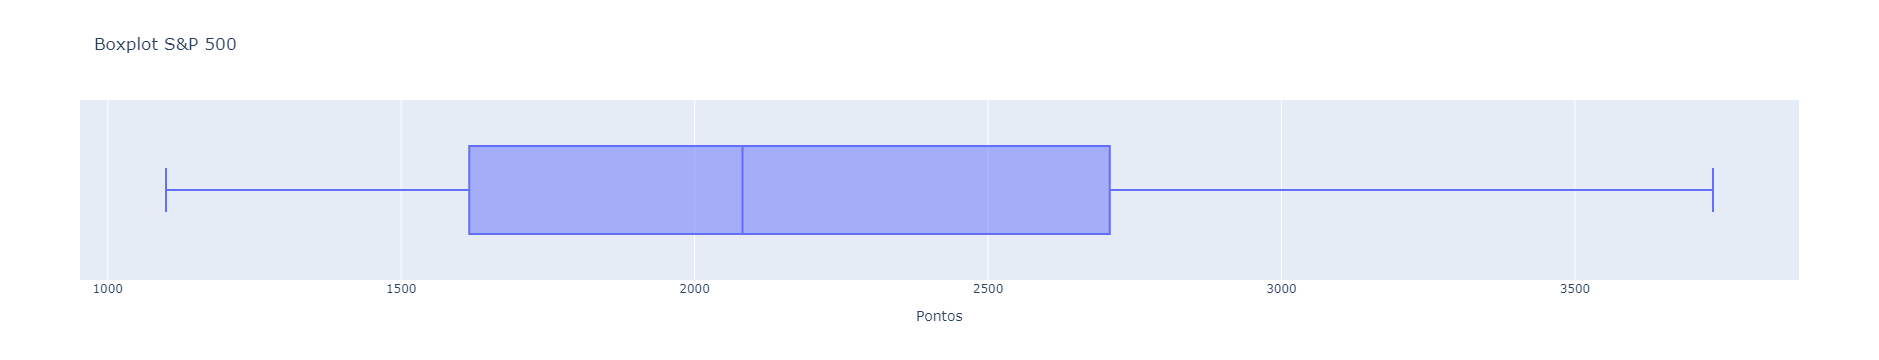

In [52]:
#Verificando os quartis do valor
fig = px.box(df, x="SP500", title="Boxplot S&P 500")
fig.update_layout(showlegend=True, xaxis_title="Pontos")
fig.show()

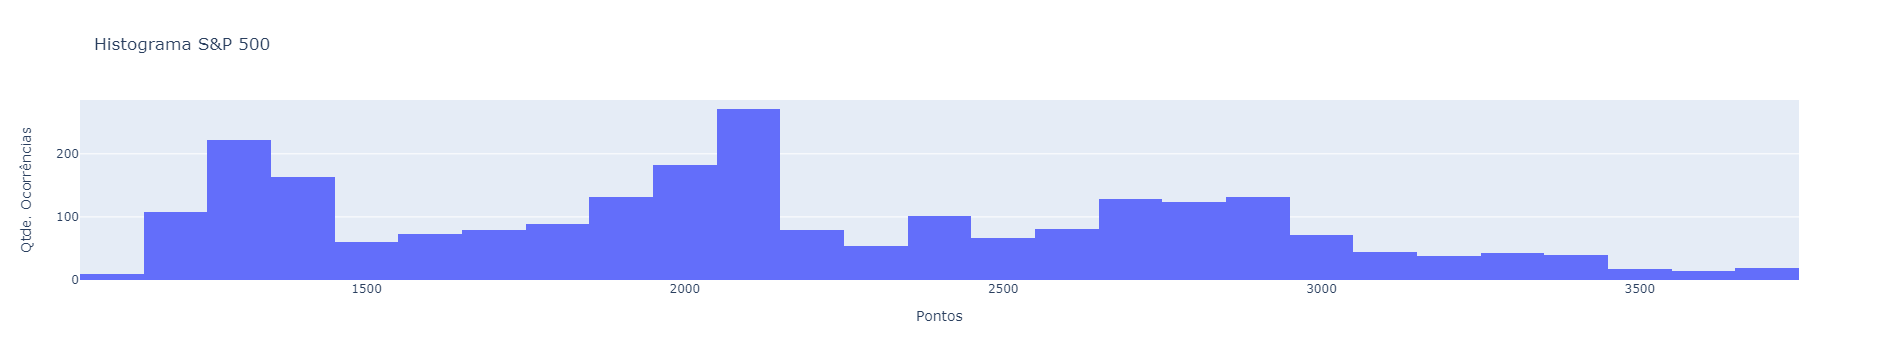

In [53]:
#Verificando range de valores
fig = px.histogram(df, x="SP500", title='Histograma S&P 500')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Pontos")
fig.show()

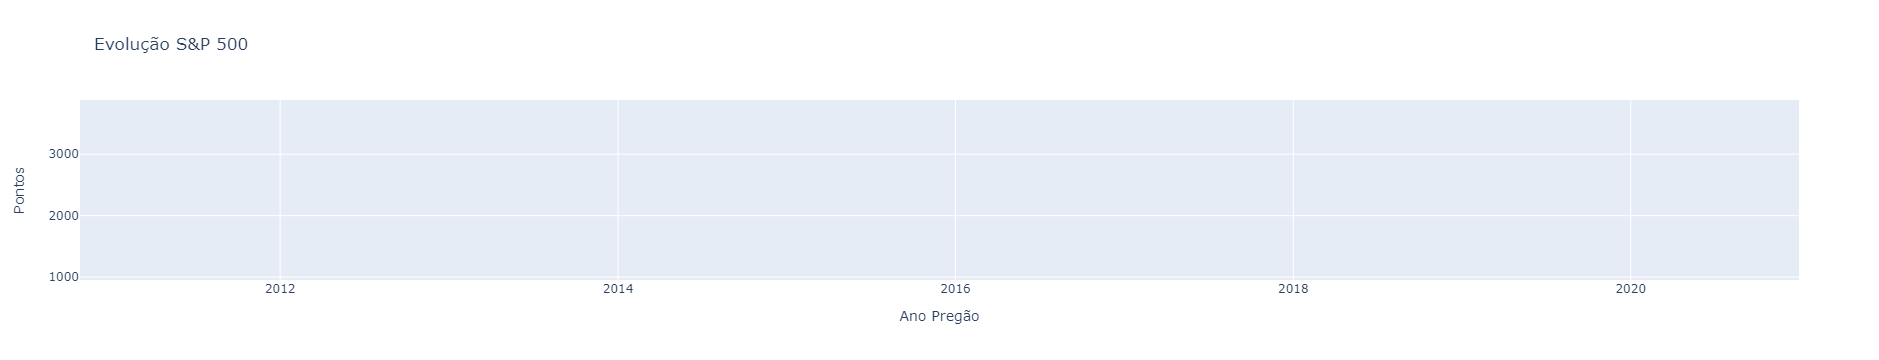

In [54]:
#Verificar período de pico do valor
fig = px.line(df, x=df.index, y="SP500", title='Evolução S&P 500')
fig.update_layout(showlegend=True, yaxis_title="Pontos", xaxis_title="Ano Pregão")
fig.show()

#### BOVESPA

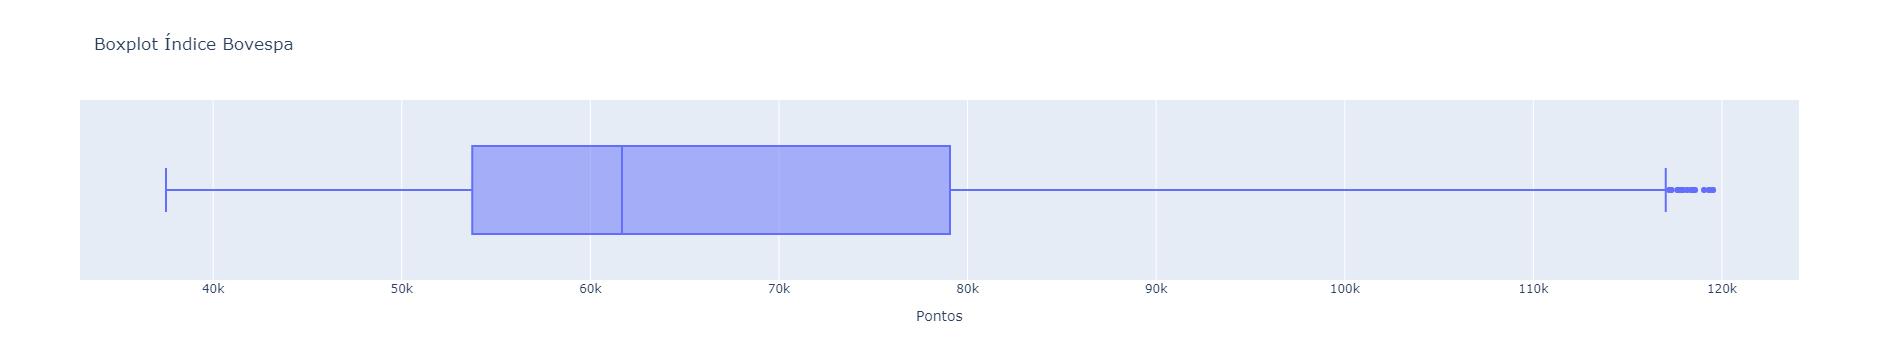

In [55]:
fig = px.box(df, x="BOVESPA", title="Boxplot Índice Bovespa")
fig.update_layout(showlegend=True, xaxis_title="Pontos")
fig.show()

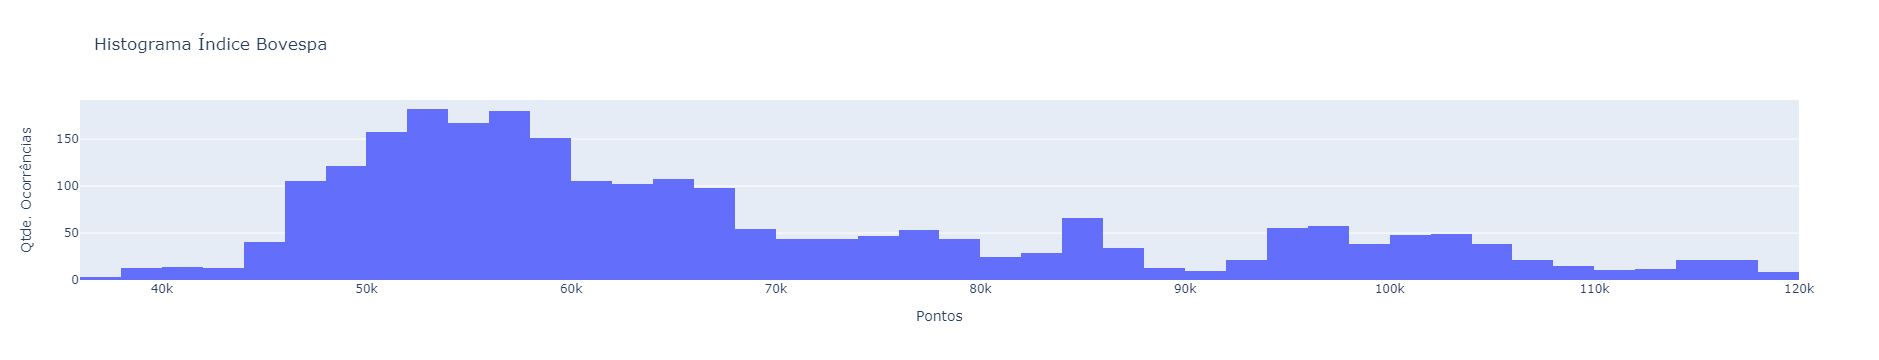

In [56]:
#Verificando range de valores
fig = px.histogram(df, x="BOVESPA", title='Histograma Índice Bovespa')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Pontos")
fig.show()

In [57]:
#Há valores fora do quartil onde referem-se ao período de Dezembro de 2019 a Dezembro de 2020 onde houve a ocorrência do Coronavírus causando enorme variação nas bolsas mundiais
np.unique(df.query("BOVESPA > 113000").index.year), np.count_nonzero(np.unique(df.query("BOVESPA > 113000").index.date)), df.query("BOVESPA > 112000").index.min(), df.query("BOVESPA > 112000").index.max()

(array([2019, 2020], dtype=int64),
 57,
 Timestamp('2019-12-12 00:00:00'),
 Timestamp('2020-12-30 00:00:00'))

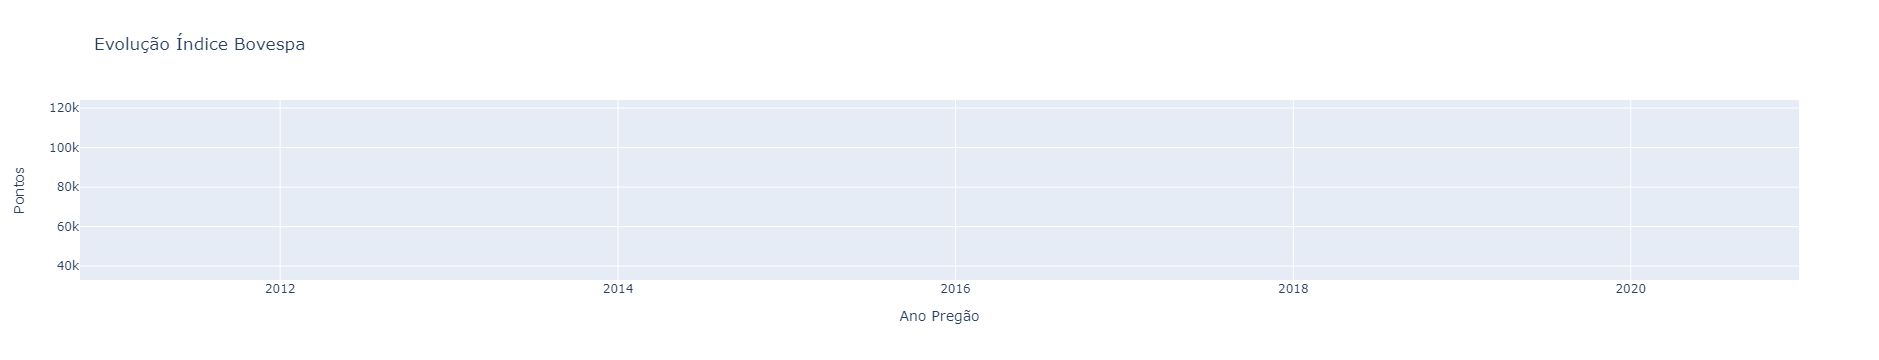

In [58]:
#Verificar período de pico do Índice Bovespa
fig = px.line(df, x=df.index, y="BOVESPA", title='Evolução Índice Bovespa')
fig.update_layout(showlegend=True, yaxis_title="Pontos", xaxis_title="Ano Pregão")
fig.show()

In [59]:
#Removendo os dados do pico de 2019/2020
df = df.query("BOVESPA < 112000")
df.query("BOVESPA > 112000").index.min(), df.query("BOVESPA > 112000").index.max()

(NaT, NaT)

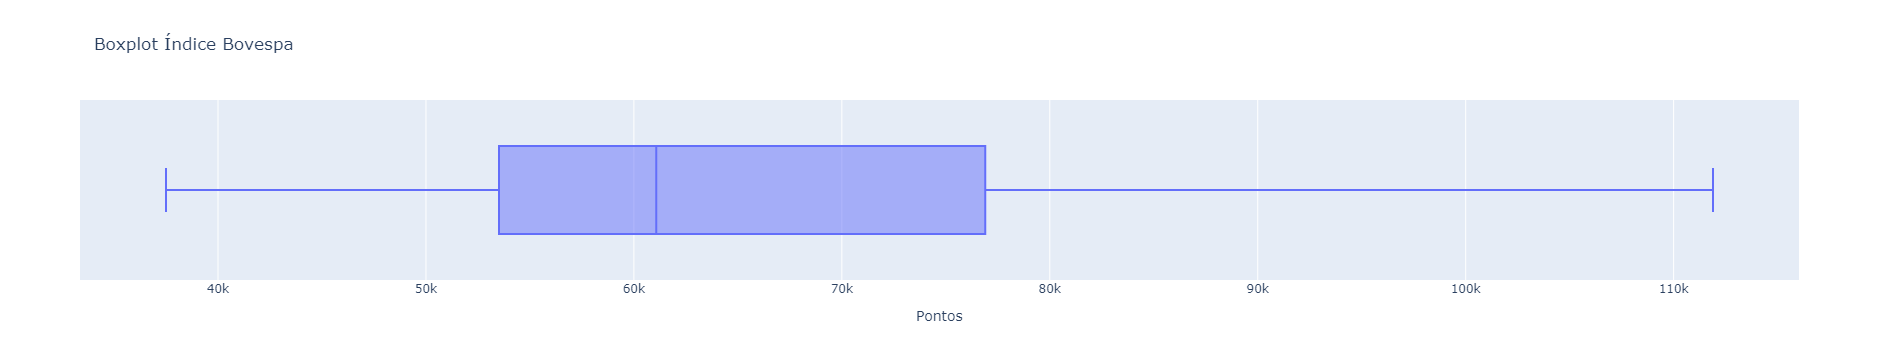

In [60]:
#Verificando como ficou a distribuição dos dados
fig = px.box(df, x="BOVESPA", title="Boxplot Índice Bovespa")
fig.update_layout(showlegend=True, xaxis_title="Pontos")
fig.show()

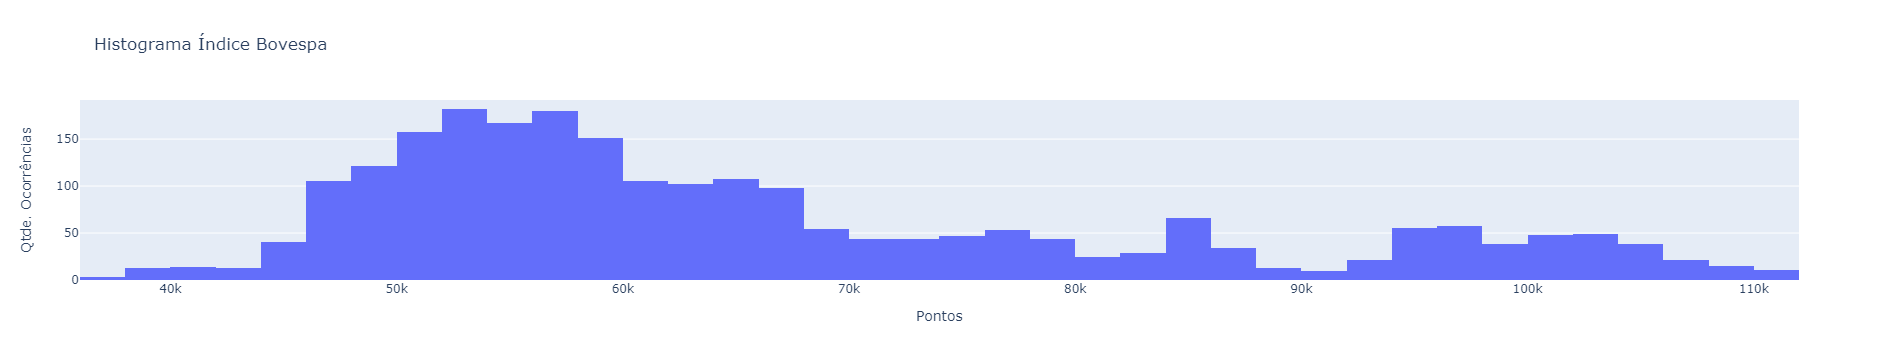

In [61]:
#Verificando range de valores
fig = px.histogram(df, x="BOVESPA", title='Histograma Índice Bovespa')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Pontos")
fig.show()

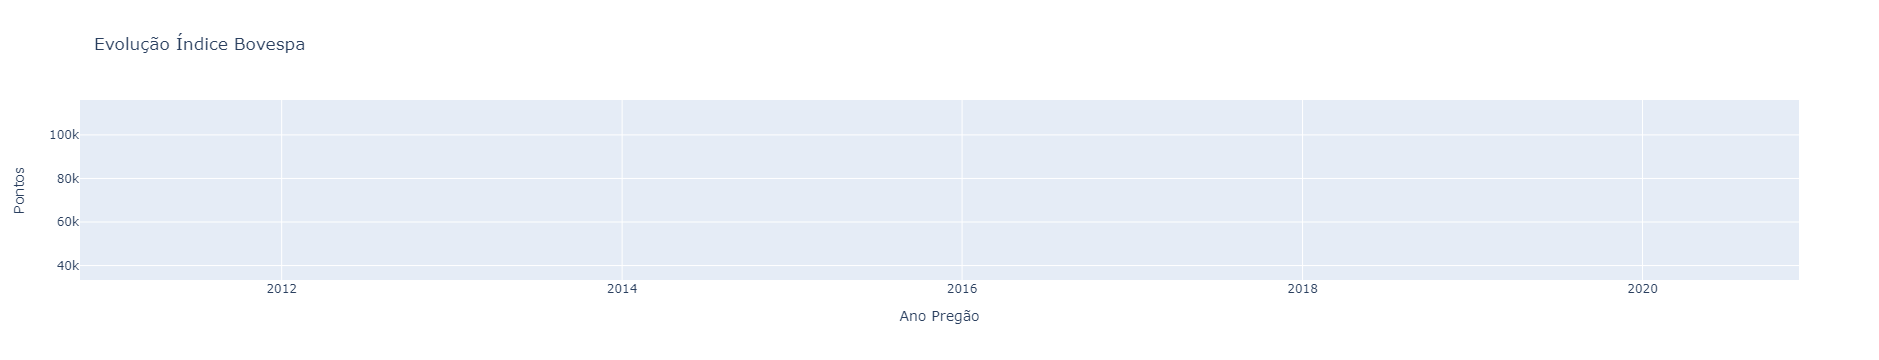

In [62]:
#Verificar período de pico do Índice Bovespa
fig = px.line(df, x=df.index, y="BOVESPA", title='Evolução Índice Bovespa')
fig.update_layout(showlegend=True, yaxis_title="Pontos", xaxis_title="Ano Pregão")
fig.show()

#### BOVESPA_VOLUME

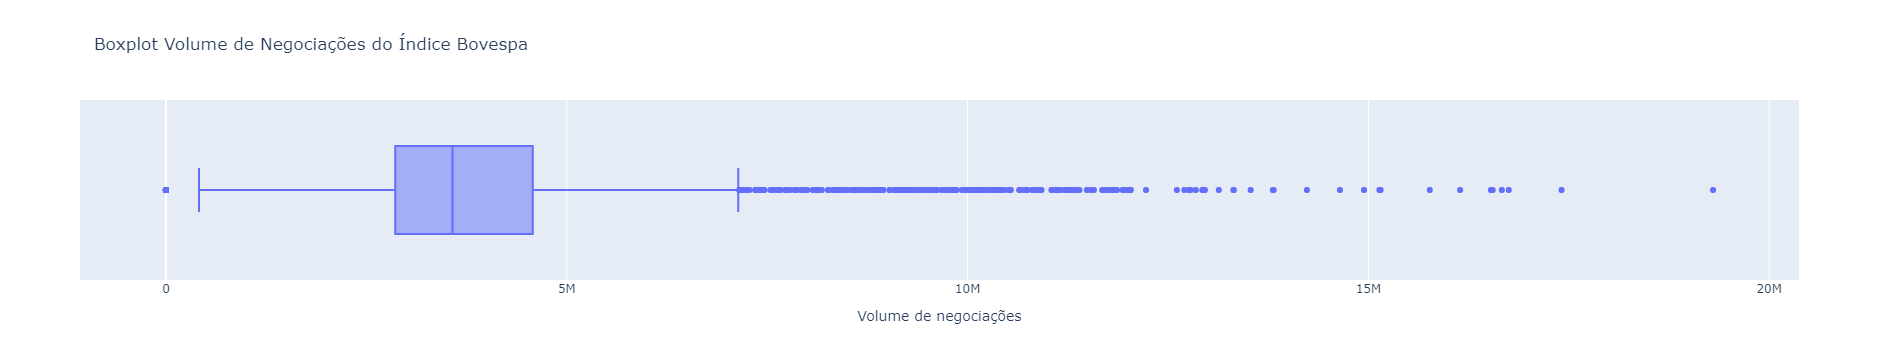

In [63]:
fig = px.box(df, x="BOVESPA_VOLUME", title="Boxplot Volume de Negociações do Índice Bovespa")
fig.update_layout(showlegend=True, xaxis_title="Volume de negociações")
fig.show()

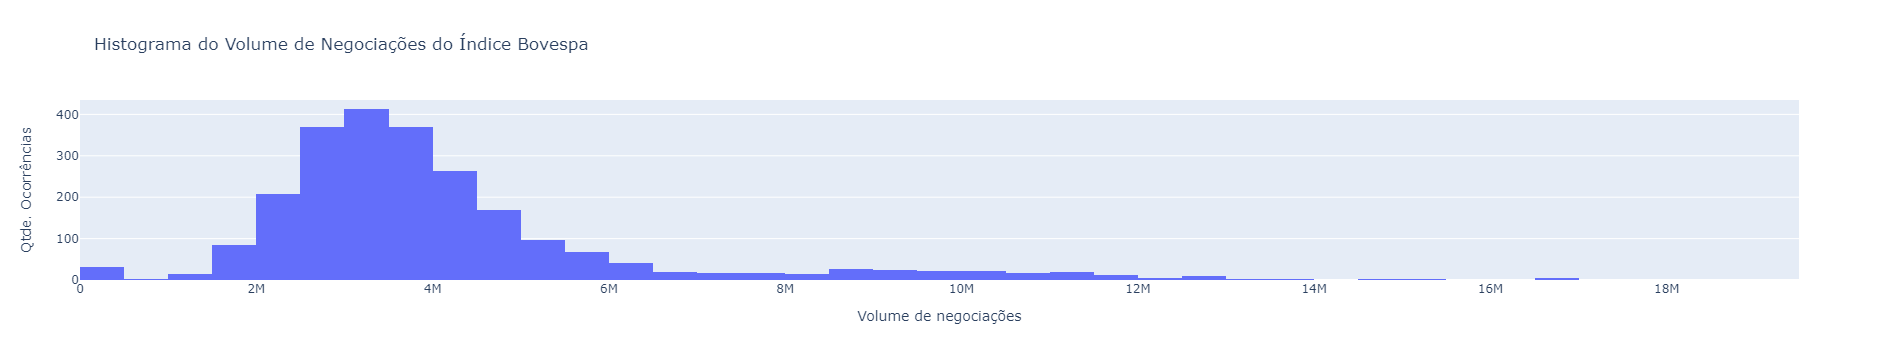

In [64]:
#Verificando range de valores
fig = px.histogram(df, x="BOVESPA_VOLUME", title='Histograma do Volume de Negociações do Índice Bovespa')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Volume de negociações")
fig.show()

In [65]:
np.unique(df.query("BOVESPA_VOLUME > 5000000 | BOVESPA_VOLUME < 411000").index.year), np.count_nonzero(np.unique(df.query("BOVESPA_VOLUME > 5000000 | BOVESPA_VOLUME < 411000").index.date))

(array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
       dtype=int64),
 482)

In [66]:
# Por estes valores estarem dispostos em diversos anos da análise e alguns deles estarem diretamente ligados a acontecimentos específicos, deixaremos estes dados atrelados à análise

#### OURO


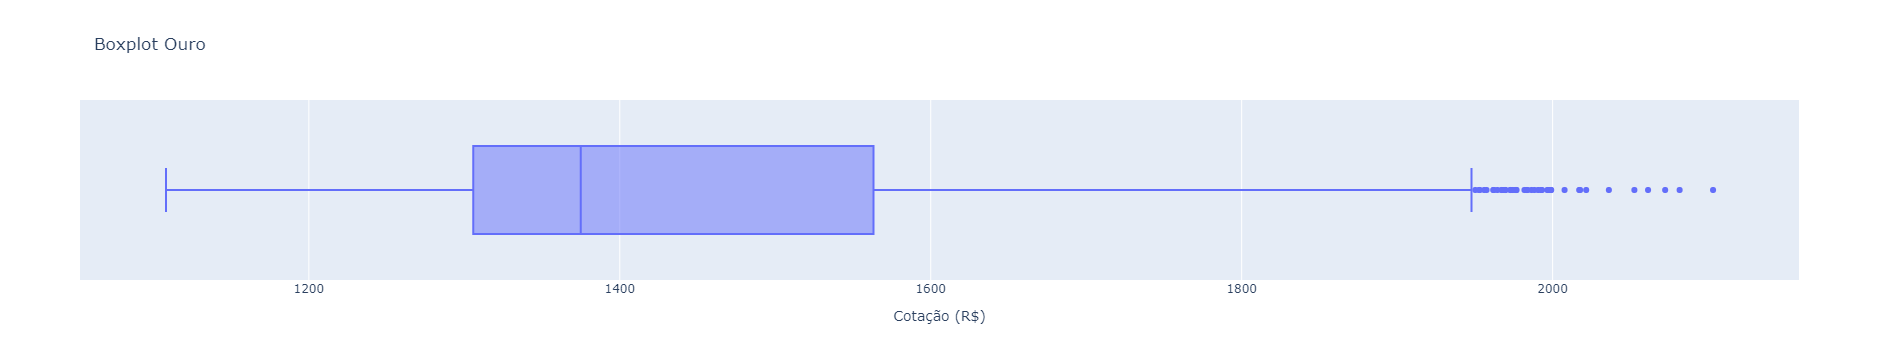

In [67]:
fig = px.box(df, x="OURO", title="Boxplot Ouro")
fig.update_layout(showlegend=True, xaxis_title="Cotação (R$)")
fig.show()

In [68]:
#Encontramos mais 320 pregões espalhados por 3 anos
np.unique(df.query("OURO > 1800").index.year), np.count_nonzero(np.unique(df.query("OURO > 1700").index.date))

(array([2011, 2020], dtype=int64), 302)

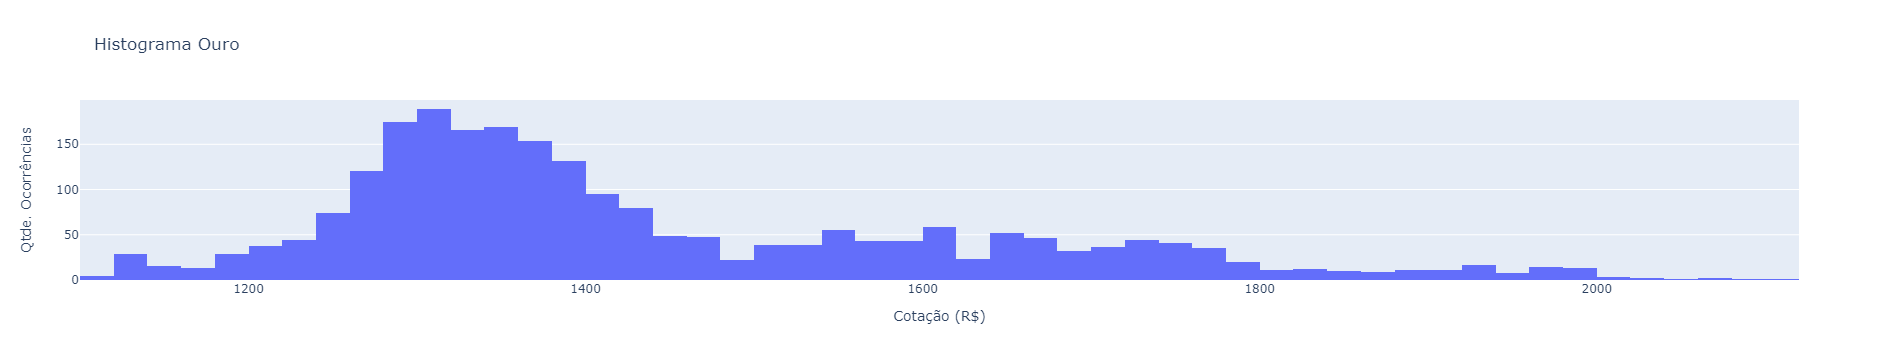

In [69]:
#Verificando range de valores
fig = px.histogram(df, x="OURO", title='Histograma Ouro')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Cotação (R$)")
fig.show()

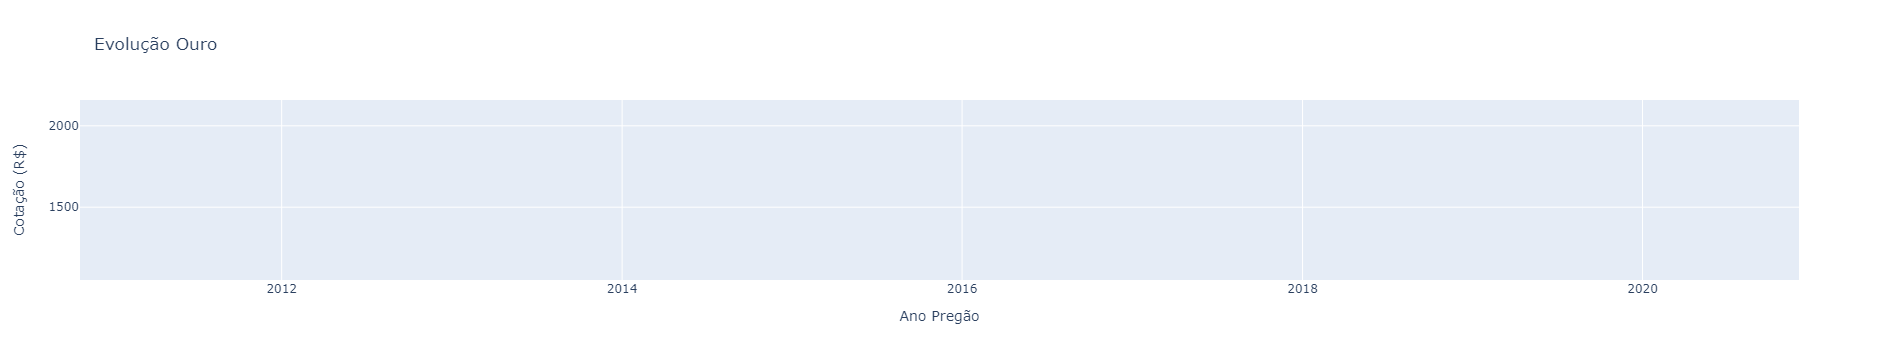

In [70]:
#Verificar período de pico do valor
fig = px.line(df, x=df.index, y="OURO", title='Evolução Ouro')
fig.update_layout(showlegend=True, yaxis_title="Cotação (R$)", xaxis_title="Ano Pregão")
fig.show()

Geralmente a busca pelo ouro decorre da busca de aplicações consideradas mais seguras como metais preciosos
Segundo notícias isto ocorreu em 2011: http://g1.globo.com/economia/noticia/2011/08/ouro-supera-a-barreira-de-us-1700-a-onca-pela-primeira-vez.html e continuou por 2012. Em 2020 devido o advendo da pandemia houve também esta maior demanda desses metais preciosos batendo esta cotação de 2012 conforme notícias: https://www.infomoney.com.br/onde-investir/com-a-maior-cotacao-desde-2012-o-que-esperar-do-ouro-daqui-para-frente/

#### OURO_VOLUME


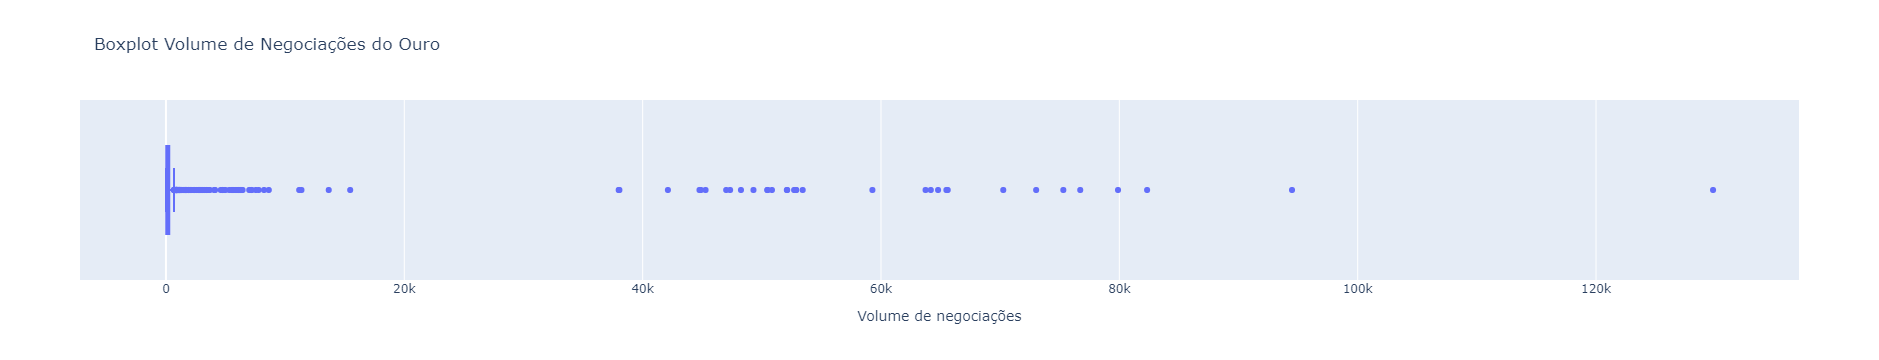

In [71]:
fig = px.box(df, x="OURO_VOLUME", title="Boxplot Volume de Negociações do Ouro")
fig.update_layout(showlegend=True, xaxis_title="Volume de negociações")
fig.show()

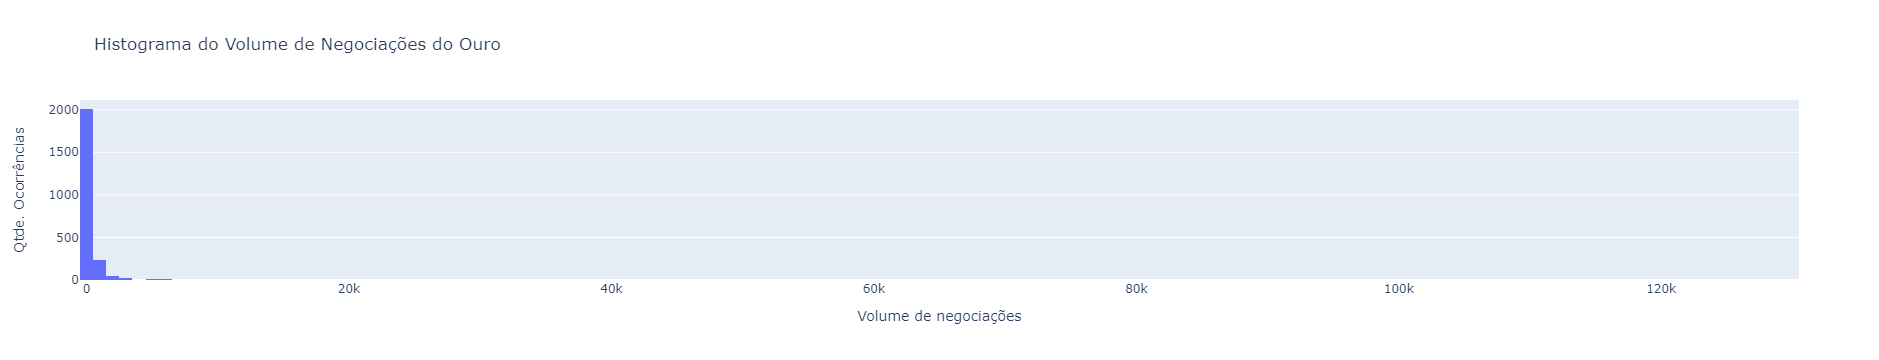

In [72]:
#Verificando range de valores
fig = px.histogram(df, x="OURO_VOLUME", title='Histograma do Volume de Negociações do Ouro')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Volume de negociações")
fig.show()

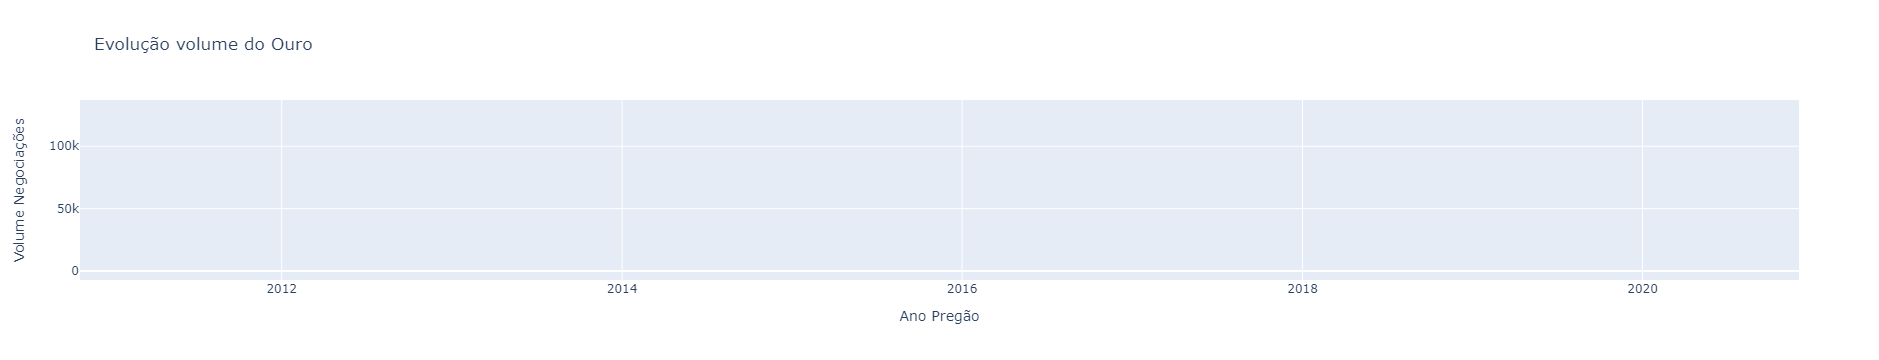

In [73]:
#Verificar período de pico do valor
fig = px.line(df, x=df.index, y="OURO_VOLUME", title='Evolução volume do Ouro')
fig.update_layout(showlegend=True, yaxis_title="Volume Negociações", xaxis_title="Ano Pregão")
fig.show()

In [74]:
#Definindo range de corte
np.unique(df.query("OURO_VOLUME > 2000").index.year), np.count_nonzero(np.unique(df.query("OURO_VOLUME > 2000").index.date))

(array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2020],
       dtype=int64),
 102)

In [75]:
#Retirando valores zerados para a negociação do Ouro
df = df.query("OURO_VOLUME > 0 & OURO_VOLUME < 2000")
df.query("OURO_VOLUME == 0").OURO_VOLUME.count()

0

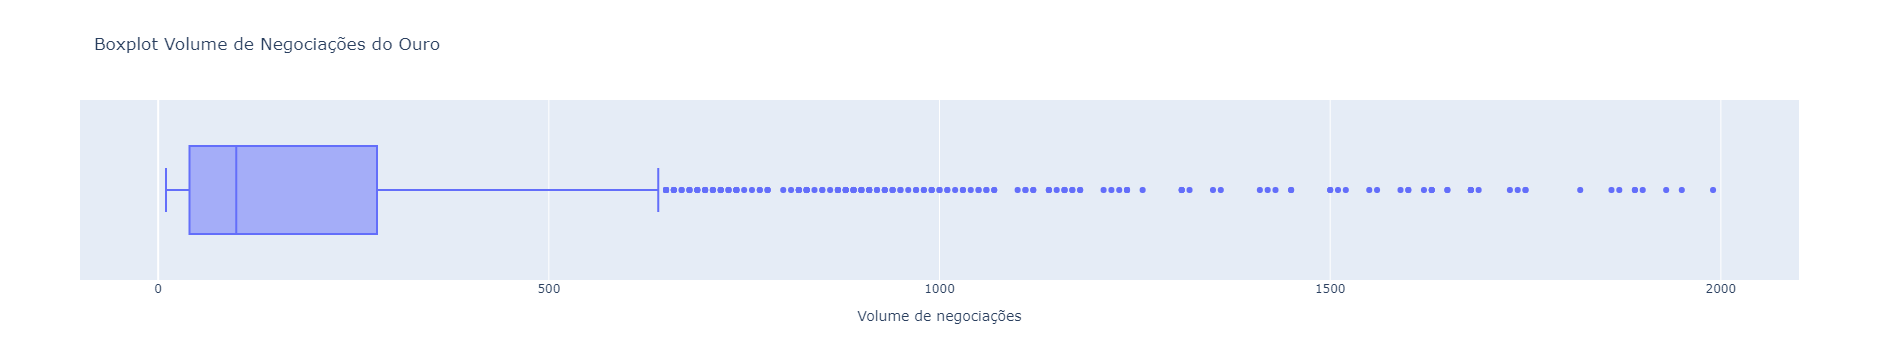

In [76]:
fig = px.box(df, x="OURO_VOLUME", title="Boxplot Volume de Negociações do Ouro")
fig.update_layout(showlegend=True, xaxis_title="Volume de negociações")
fig.show()

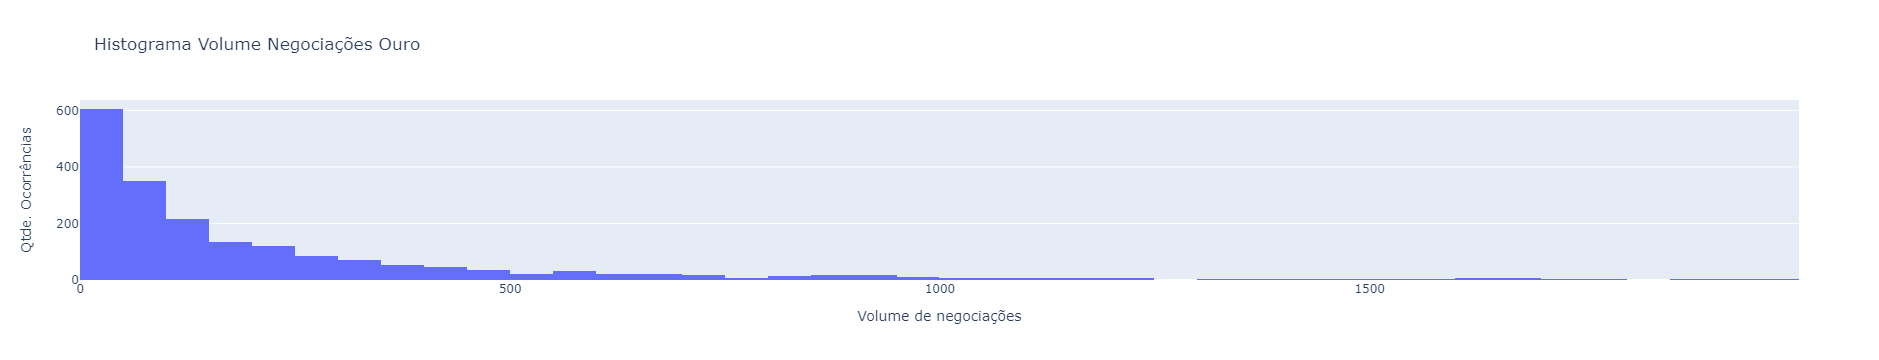

In [77]:
#Verificando range de valores
fig = px.histogram(df, x="OURO_VOLUME", title='Histograma Volume Negociações Ouro')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Volume de negociações")
fig.show()

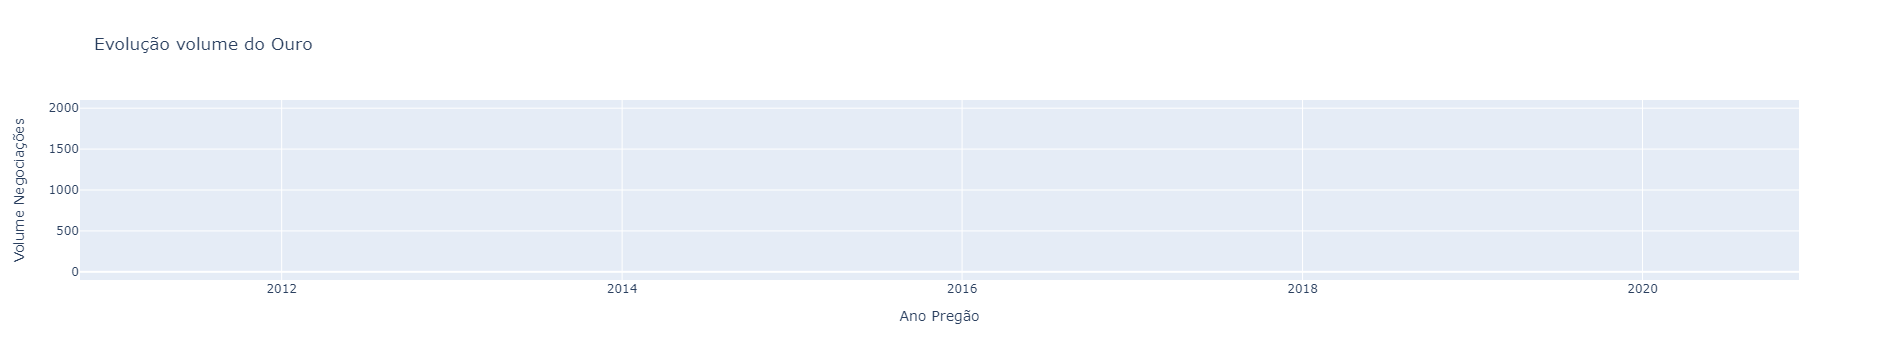

In [78]:
#Verificar período de pico do valor
fig = px.line(df, x=df.index, y="OURO_VOLUME", title='Evolução volume do Ouro')
fig.update_layout(showlegend=True, yaxis_title="Volume Negociações", xaxis_title="Ano Pregão")
fig.show()

#### PETROLEO
Náo houve a incidência de outliers para o preço do barril do petróleo

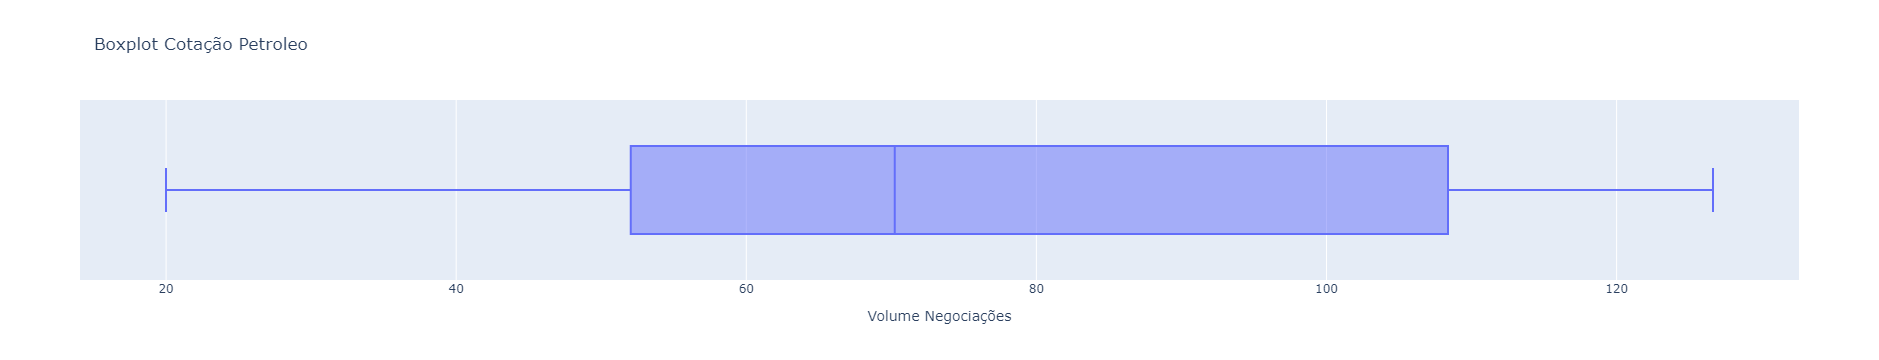

In [79]:
fig = px.box(df, x="PETROLEO", title="Boxplot Cotação Petroleo")
fig.update_layout(showlegend=True, xaxis_title="Volume Negociações")
fig.show()

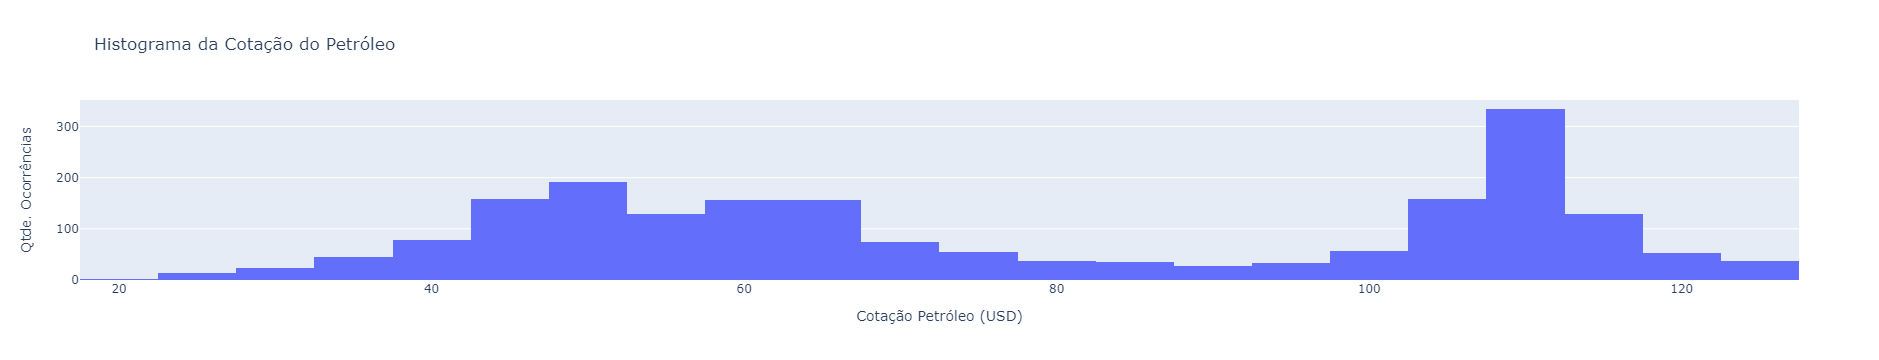

In [80]:
#Verificando range de valores
fig = px.histogram(df, x="PETROLEO", title='Histograma da Cotação do Petróleo')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Cotação Petróleo (USD)")
fig.show()

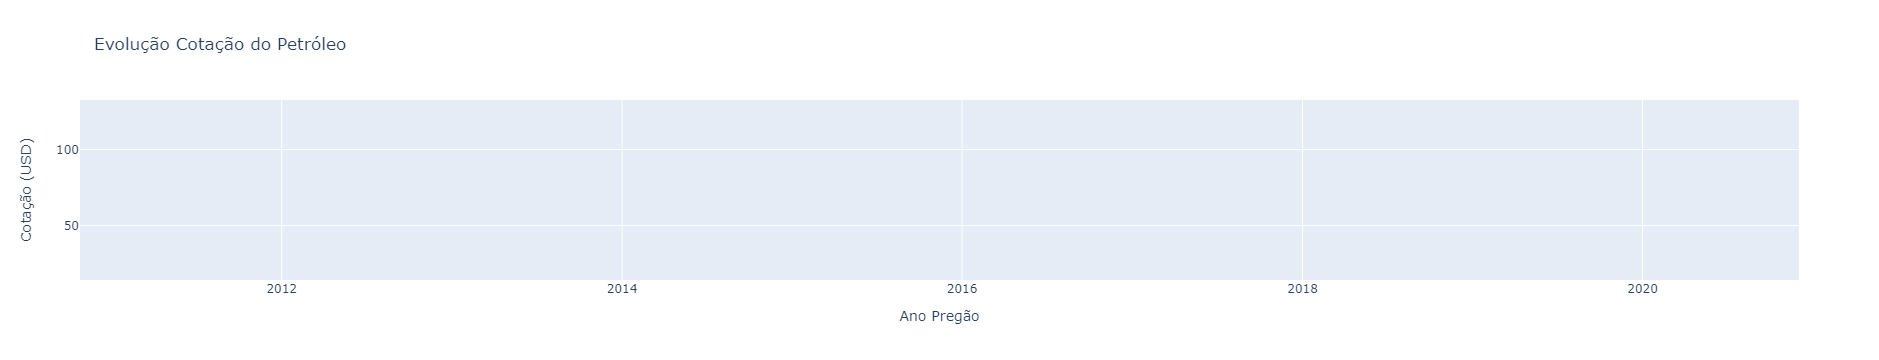

In [81]:
#Verificar período de pico do valor
fig = px.line(df, x=df.index, y="PETROLEO", title='Evolução Cotação do Petróleo')
fig.update_layout(showlegend=True, yaxis_title="Cotação (USD)", xaxis_title="Ano Pregão")
fig.show()

#### PETROLEO_VOLUME

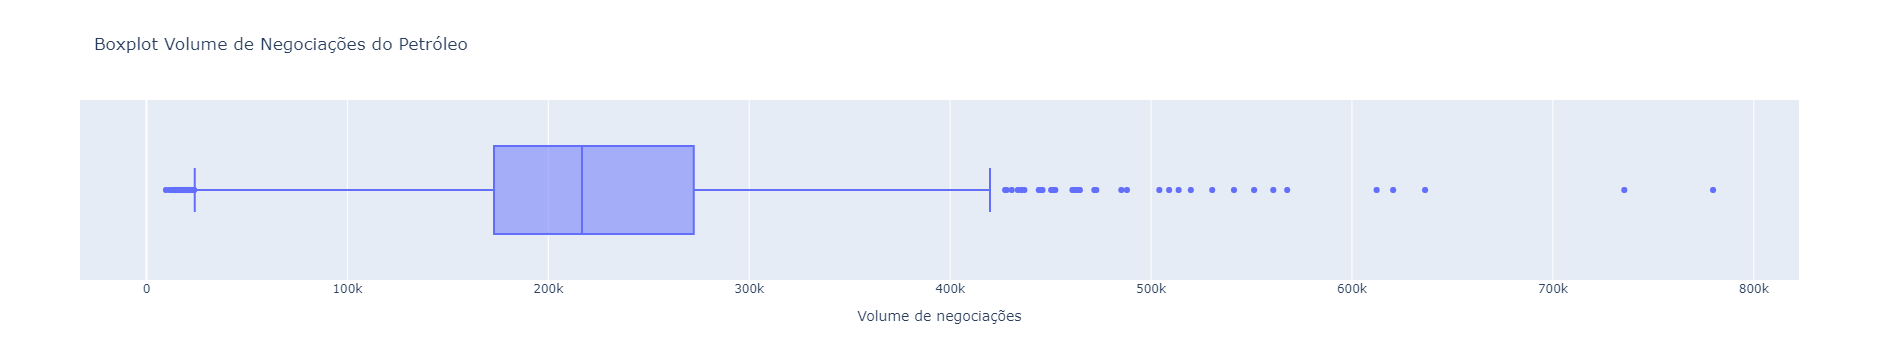

In [82]:
fig = px.box(df, x="PETROLEO_VOLUME", title="Boxplot Volume de Negociações do Petróleo")
fig.update_layout(showlegend=True, xaxis_title="Volume de negociações")
fig.show()

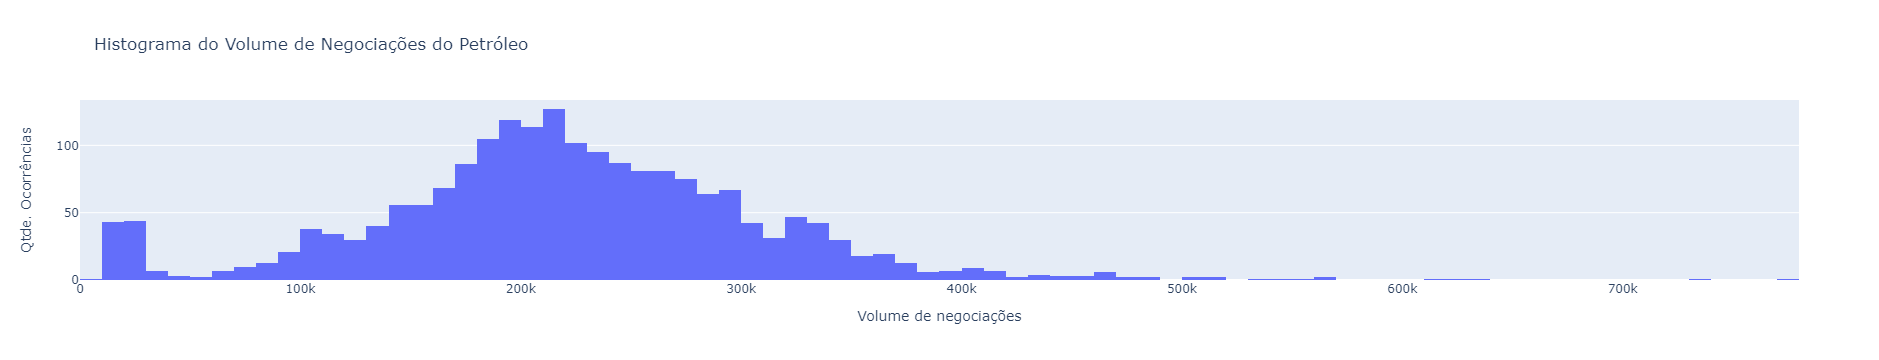

In [83]:
#Verificando range de valores
fig = px.histogram(df, x="PETROLEO_VOLUME", title='Histograma do Volume de Negociações do Petróleo')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Volume de negociações")
fig.show()

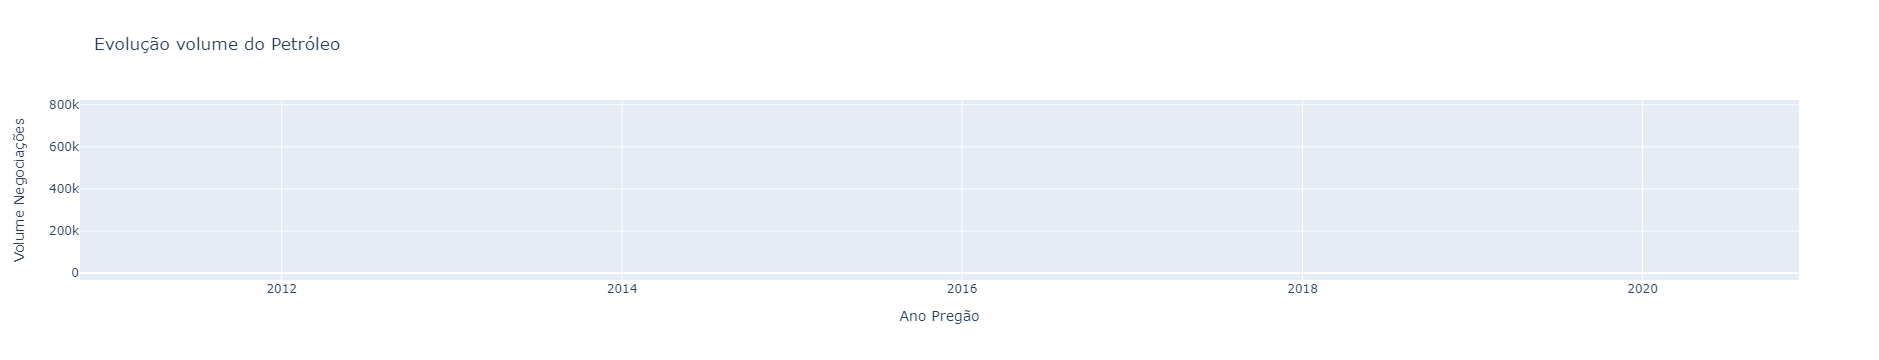

In [84]:
#Verificar período de pico do valor
fig = px.line(df, x=df.index, y="PETROLEO_VOLUME", title='Evolução volume do Petróleo')
fig.update_layout(showlegend=True, yaxis_title="Volume Negociações", xaxis_title="Ano Pregão")
fig.show()

In [85]:
#Verificando Valores que estão fora dos quartis centrais
#Por verificar a ocorrência de outliers em uma quantidade expressiva de pregões optamos por deixá-los presentes evidenciando a negociação real do ativo
np.unique(df.query("PETROLEO_VOLUME < 173000 | PETROLEO_VOLUME > 273000").index.year), np.count_nonzero(np.unique(df.query("PETROLEO_VOLUME < 173000 | PETROLEO_VOLUME > 273000").index.date))

(array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
       dtype=int64),
 985)

#### FERRO

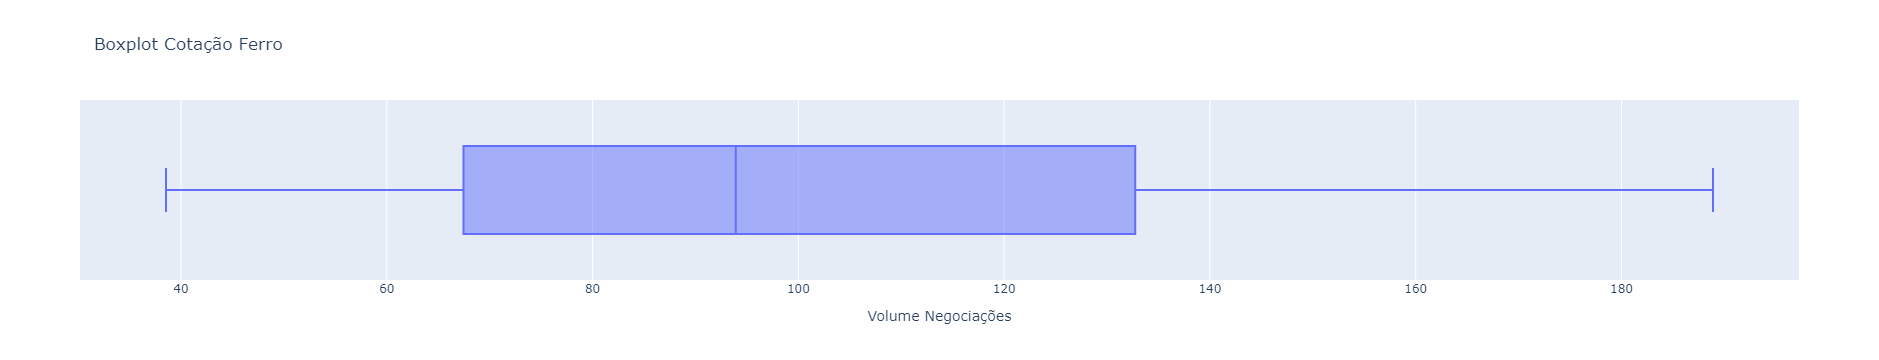

In [86]:
fig = px.box(df, x="FERRO", title="Boxplot Cotação Ferro")
fig.update_layout(showlegend=True, xaxis_title="Volume Negociações")
fig.show()

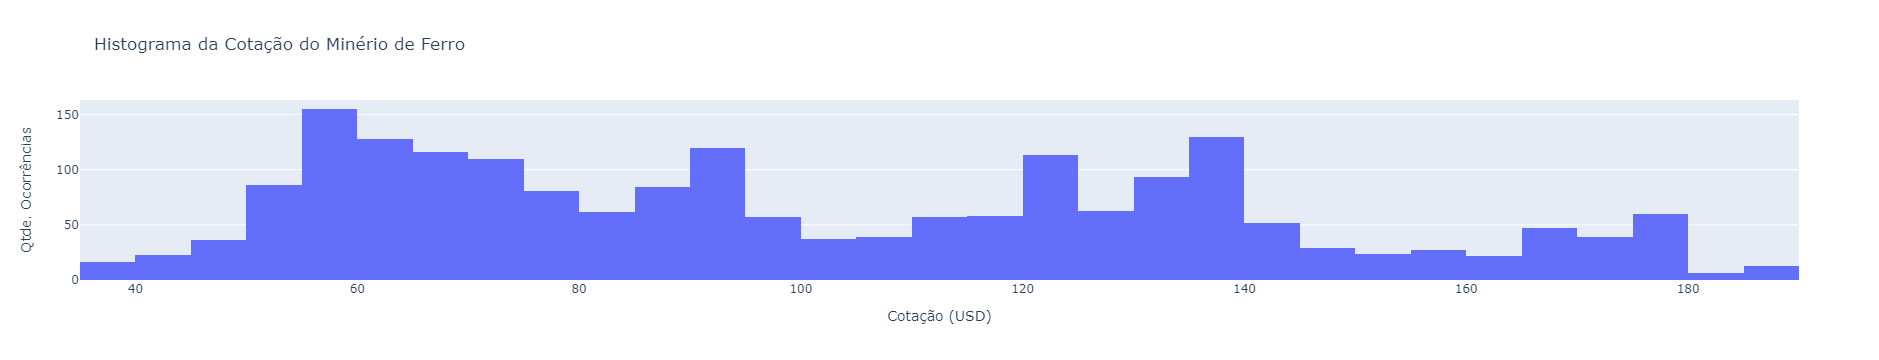

In [87]:
#Verificando range de valores
fig = px.histogram(df, x="FERRO", title='Histograma da Cotação do Minério de Ferro')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Cotação (USD)")
fig.show()

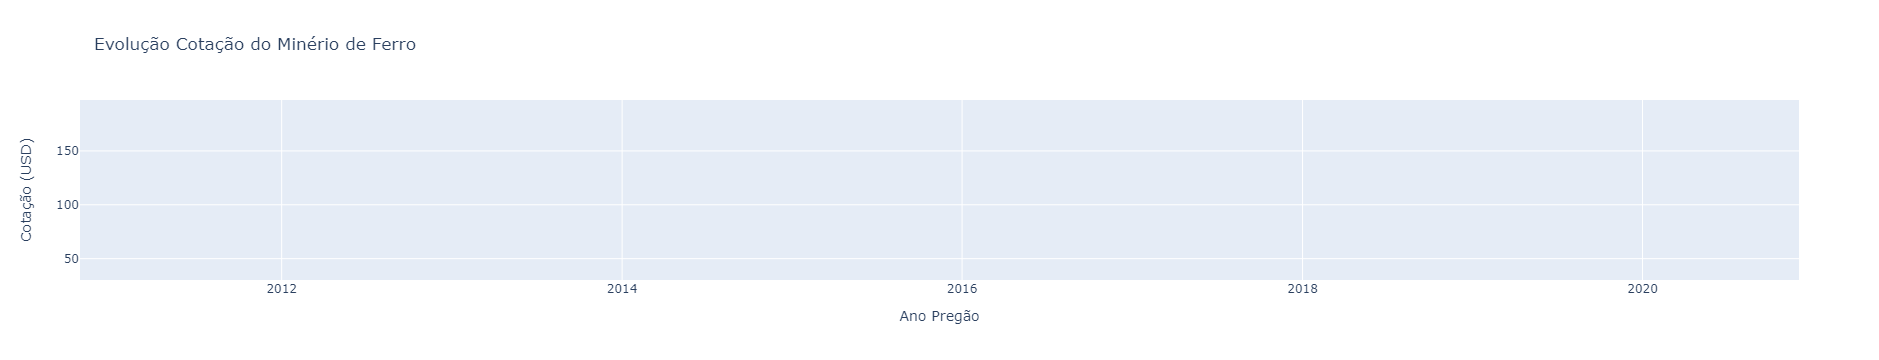

In [88]:
#Verificar período de pico do valor
fig = px.line(df, x=df.index, y="FERRO", title='Evolução Cotação do Minério de Ferro')
fig.update_layout(showlegend=True, yaxis_title="Cotação (USD)", xaxis_title="Ano Pregão")
fig.show()

#### DOLAR
Não foram encontrados outliers para a cotação do Dólar nestes últimos 10 anos

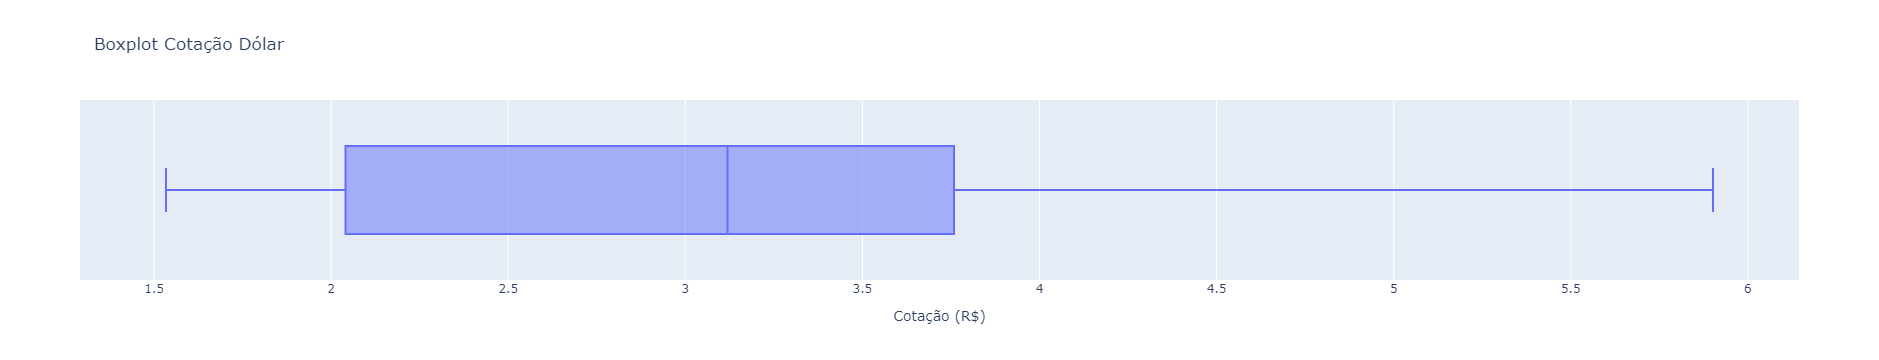

In [89]:
fig = px.box(df, x="DOLAR", title="Boxplot Cotação Dólar")
fig.update_layout(showlegend=True, xaxis_title="Cotação (R$)")
fig.show()

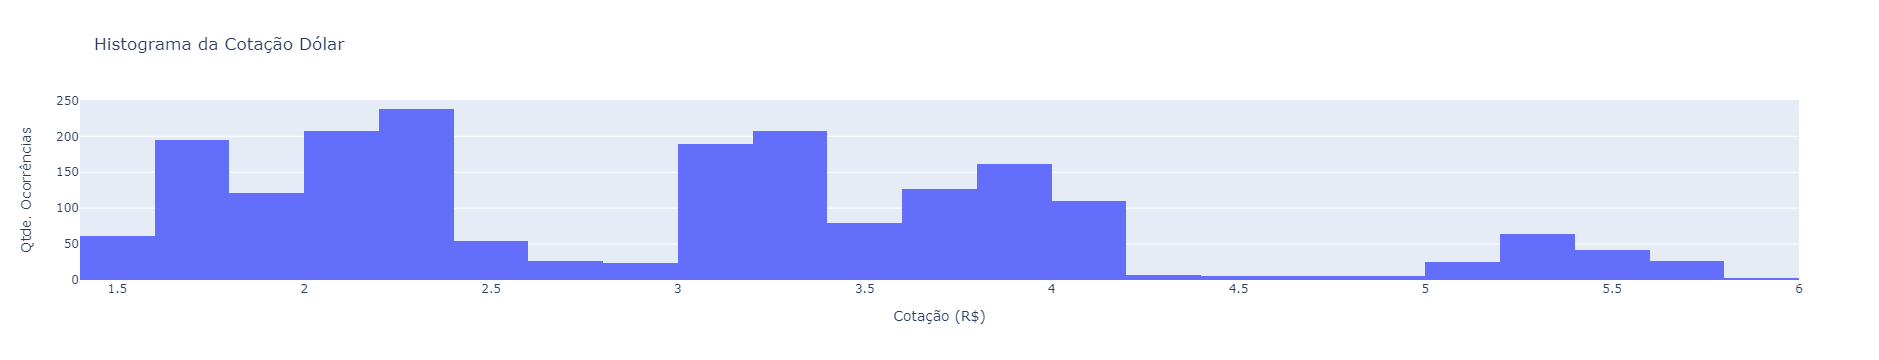

In [90]:
#Verificando range de valores
fig = px.histogram(df, x="DOLAR", title='Histograma da Cotação Dólar')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Cotação (R$)")
fig.show()

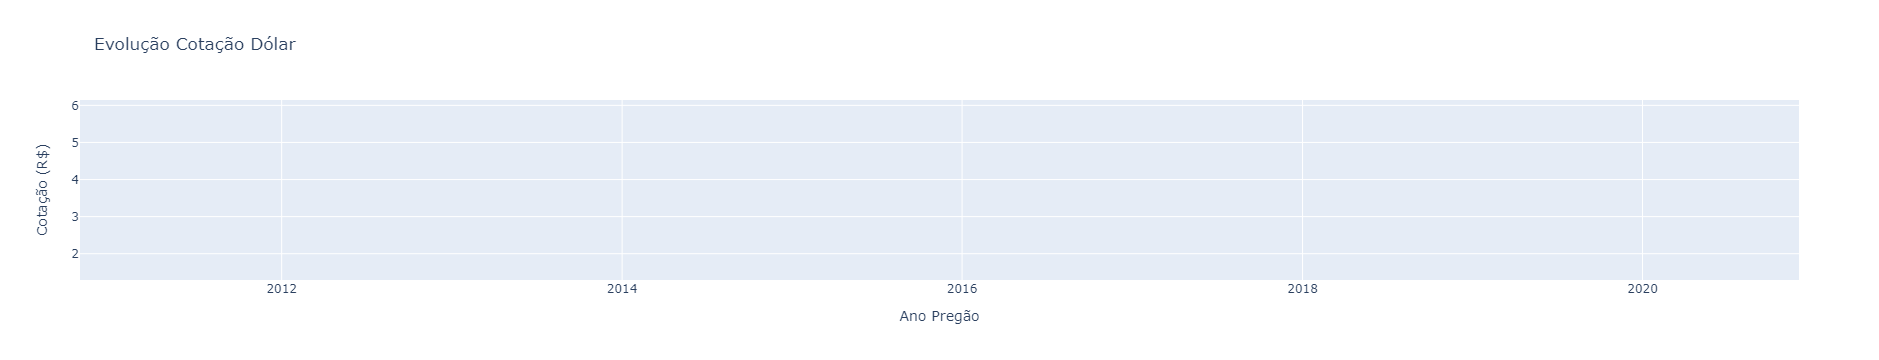

In [91]:
#Verificar período de pico do valor
fig = px.line(df, x=df.index, y="DOLAR", title='Evolução Cotação Dólar')
fig.update_layout(showlegend=True, yaxis_title="Cotação (R$)", xaxis_title="Ano Pregão")
fig.show()

#### SELIC
Não foram encontrados outliers para a cotação da selic nos últimos 10 anos

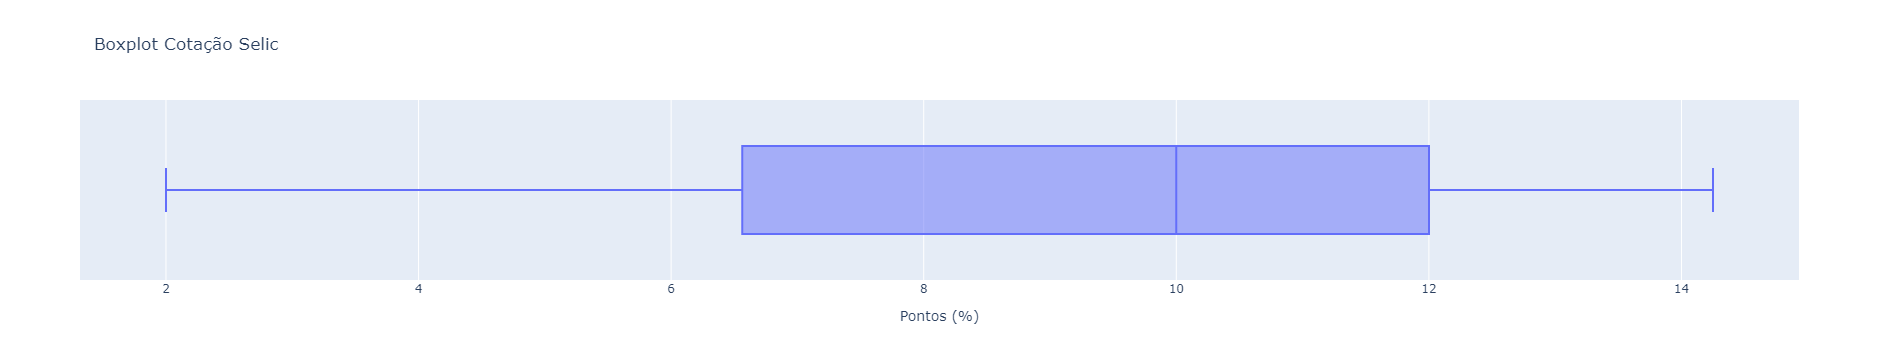

In [92]:
fig = px.box(df, x="SELIC", title="Boxplot Cotação Selic")
fig.update_layout(showlegend=True, xaxis_title="Pontos (%)")
fig.show()

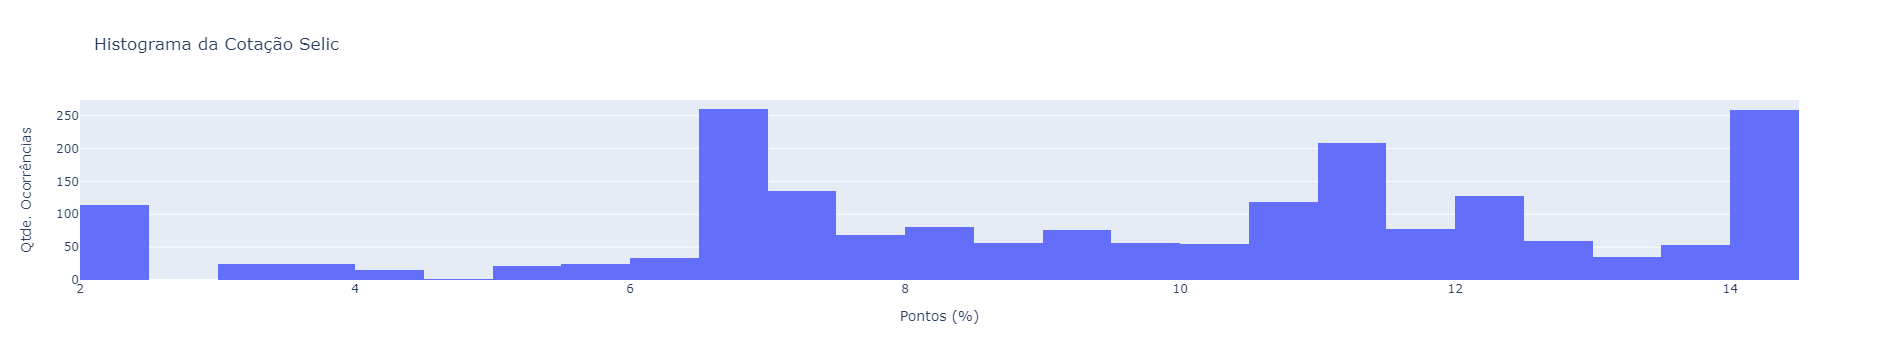

In [93]:
#Verificando range de valores
fig = px.histogram(df, x="SELIC", title='Histograma da Cotação Selic')
fig.update_layout(showlegend=True, yaxis_title="Qtde. Ocorrências", xaxis_title="Pontos (%)")
fig.show()

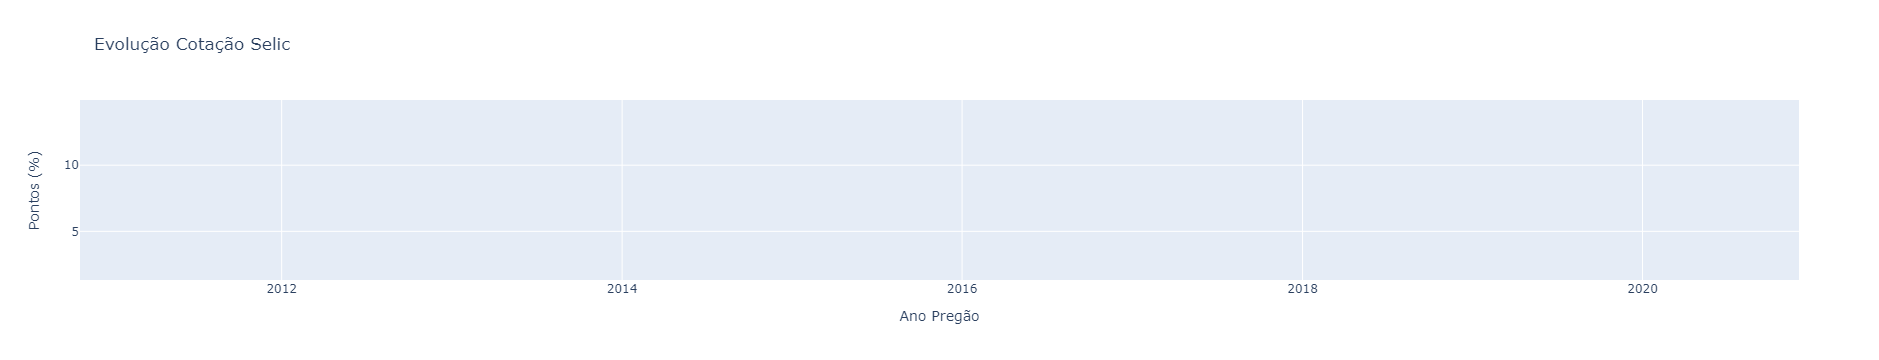

In [94]:
#Verificar período de pico do valor
fig = px.line(df, x=df.index, y="SELIC", title='Evolução Cotação Selic')
fig.update_layout(showlegend=True, yaxis_title="Pontos (%)", xaxis_title="Ano Pregão")
fig.show()

## Feature engineering

### Criando métricas auxiliares

#### Métricas para cálculo

In [95]:
#Criando médias móveis para os dados
df['SP500_MM_30'] = df.SP500.rolling(30).mean().shift()
df['BOVESPA_MM_30'] = df.BOVESPA.rolling(30).mean().shift()
df['BOVESPA_VOLUME_MM_30'] = df.BOVESPA_VOLUME.rolling(30).mean().shift()
df['OURO_MM_30'] = df.OURO.rolling(30).mean().shift()
df['OURO_VOLUME_MM_30'] = df.OURO_VOLUME.rolling(30).mean().shift()
df['PETROLEO_MM_30'] = df.PETROLEO.rolling(30).mean().shift()
df['PETROLEO_VOLUME_MM_30'] = df.PETROLEO_VOLUME.rolling(30).mean().shift()
df['FERRO_MM_30'] = df.FERRO.rolling(30).mean().shift()
df['DOLAR_MM_30'] = df.DOLAR.rolling(30).mean().shift()
df['SELIC_MM_30'] = df.SELIC.rolling(30).mean().shift()
df['BOVESPA_MM_30'] = df.BOVESPA.rolling(30).mean().shift()

#Setar o fechamento do dia anterior
df['SP500_FECHAMENTO_ANTERIOR'] = df.SP500.shift(1)
df['BOVESPA_FECHAMENTO_ANTERIOR'] = df.BOVESPA.shift(1)
df['BOVESPA_VOLUME_FECHAMENTO_ANTERIOR'] = df.BOVESPA_VOLUME.shift(1)
df['OURO_FECHAMENTO_ANTERIOR'] = df.OURO.shift(1)
df['OURO_VOLUME_FECHAMENTO_ANTERIOR'] = df.OURO_VOLUME.shift(1)
df['PETROLEO_FECHAMENTO_ANTERIOR'] = df.PETROLEO.shift(1)
df['PETROLEO_VOLUME_FECHAMENTO_ANTERIOR'] = df.PETROLEO_VOLUME.shift(1)
df['FERRO_FECHAMENTO_ANTERIOR'] = df.FERRO.shift(1)
df['DOLAR_FECHAMENTO_ANTERIOR'] = df.DOLAR.shift(1)
df['SELIC_FECHAMENTO_ANTERIOR'] = df.SELIC.shift(1)
df['BOVESPA_FECHAMENTO_ANTERIOR'] = df.BOVESPA.shift(1)


In [96]:
#Para setar o resultado esperado criaremos estas variáveis para verificação
df['SP500_RESULT_30'] = df.SP500.shift(-30)
df['BOVESPA_RESULT_30'] = df.BOVESPA.shift(-30)
df['BOVESPA_VOLUME_RESULT_30'] = df.BOVESPA_VOLUME.shift(-30)
df['OURO_RESULT_30'] = df.OURO.shift(-30)
df['OURO_VOLUME_RESULT_30'] = df.OURO_VOLUME.shift(-30)
df['PETROLEO_RESULT_30'] = df.PETROLEO.shift(-30)
df['PETROLEO_VOLUME_RESULT_30'] = df.PETROLEO_VOLUME.shift(-30)
df['FERRO_RESULT_30'] = df.FERRO.shift(-30)
df['DOLAR_RESULT_30'] = df.DOLAR.shift(-30)
df['SELIC_RESULT_30'] = df.SELIC.shift(-30)

#Criando métricas condicionais para medir o retorno mínimo esperado e o maior retorno dentre os pilares de investimento
df['SP500_RESULT_DIFF'] = ((df.SP500_RESULT_30 / df.SP500) - 1) * 100
df['BOVESPA_RESULT_DIFF'] = ((df.BOVESPA_RESULT_30 / df.BOVESPA) - 1) * 100
df['OURO_RESULT_DIFF'] = ((df.OURO_RESULT_30 / df.OURO) - 1) * 100
df['DOLAR_RESULT_DIFF'] = ((df.DOLAR_RESULT_30 / df.DOLAR) - 1) * 100
df['SELIC_RESULT_DIFF'] = ((df.SELIC_RESULT_30 / df.SELIC) - 1) * 100

In [97]:
#Removendo registros com valores nulos
df = df.dropna()

### Calculando o resultado esperado
0 - Não fazer nada
1 - Aplicar no índice Bovespa
2 - Aplicar em Dólar
3 - Aplicar em Ouro
4 - Aplicar em Selic
5 - ETF SP&500

In [98]:
# Gerar a métrica de resultados de acordo com os itens que foram definidos
condicoes = [    
(df['BOVESPA_RESULT_DIFF'] > df['SP500_RESULT_DIFF']) & (df['BOVESPA_RESULT_DIFF'] > df['OURO_RESULT_DIFF']) & (df['BOVESPA_RESULT_DIFF'] > df['DOLAR_RESULT_DIFF']) & (df['BOVESPA_RESULT_DIFF'] > df['SELIC_RESULT_DIFF']) & (df['BOVESPA_RESULT_DIFF'] > 1)
, (df['DOLAR_RESULT_DIFF'] > df['SP500_RESULT_DIFF']) & (df['DOLAR_RESULT_DIFF'] > df['BOVESPA_RESULT_DIFF']) & (df['DOLAR_RESULT_DIFF'] > df['OURO_RESULT_DIFF']) & (df['DOLAR_RESULT_DIFF'] > df['SELIC_RESULT_DIFF']) & (df['DOLAR_RESULT_DIFF'] > 1)
, (df['OURO_RESULT_DIFF'] > df['SP500_RESULT_DIFF']) & (df['OURO_RESULT_DIFF'] > df['BOVESPA_RESULT_DIFF']) & (df['OURO_RESULT_DIFF'] > df['DOLAR_RESULT_DIFF']) & (df['OURO_RESULT_DIFF'] > df['SELIC_RESULT_DIFF']) & (df['OURO_RESULT_DIFF'] > 1)
, (df['SELIC_RESULT_DIFF'] > df['SP500_RESULT_DIFF']) & (df['SELIC_RESULT_DIFF'] > df['BOVESPA_RESULT_DIFF']) & (df['SELIC_RESULT_DIFF'] > df['OURO_RESULT_DIFF']) & (df['SELIC_RESULT_DIFF'] > df['DOLAR_RESULT_DIFF']) & (df['SELIC_RESULT_DIFF'] > 1)
, (df['SP500_RESULT_DIFF'] > df['BOVESPA_RESULT_DIFF']) & (df['SP500_RESULT_DIFF'] > df['OURO_RESULT_DIFF']) & (df['SP500_RESULT_DIFF'] > df['DOLAR_RESULT_DIFF']) & (df['SP500_RESULT_DIFF'] > df['SELIC_RESULT_DIFF']) & (df['SP500_RESULT_DIFF'] > 1)
]

valores = [1, 2, 3, 4, 5]
descritivos_valores = ['NÃO FAZER NADA','ÍNDICE BOVESPA','DÓLAR','OURO','SELIC','SP&500']

df['RESULTADO'] = 0
df['RESULTADO'] = np.select(condicoes, valores)

In [99]:
#Primeiro arquivo de saída gerado para conferência
df.to_csv('saida/00_conferência.csv')

In [100]:
#Apagando colunas utilizadas para calcular o resultado e que não serão utilizadas na predição
df_predicao = df.drop(['SP500', 'BOVESPA', 'BOVESPA_VOLUME', 'OURO', 'OURO_VOLUME', 'PETROLEO', 'PETROLEO_VOLUME', 'FERRO', 'DOLAR'
                            , 'SELIC', 'SP500_RESULT_30', 'BOVESPA_RESULT_30', 'BOVESPA_VOLUME_RESULT_30', 'OURO_RESULT_30', 'OURO_VOLUME_RESULT_30'
                            , 'PETROLEO_RESULT_30', 'PETROLEO_VOLUME_RESULT_30', 'FERRO_RESULT_30', 'DOLAR_RESULT_30', 'SELIC_RESULT_30', 'SP500_RESULT_DIFF'
                            , 'BOVESPA_RESULT_DIFF', 'OURO_RESULT_DIFF', 'DOLAR_RESULT_DIFF', 'SELIC_RESULT_DIFF'], axis='columns')

In [101]:
#Comparando as colunas dos dataframes mostrando as colunas a serem utilizadas para a predição
df.columns, df_predicao.columns

(Index(['SP500', 'BOVESPA', 'BOVESPA_VOLUME', 'OURO', 'OURO_VOLUME', 'PETROLEO',
        'PETROLEO_VOLUME', 'FERRO', 'DOLAR', 'SELIC', 'SP500_MM_30',
        'BOVESPA_MM_30', 'BOVESPA_VOLUME_MM_30', 'OURO_MM_30',
        'OURO_VOLUME_MM_30', 'PETROLEO_MM_30', 'PETROLEO_VOLUME_MM_30',
        'FERRO_MM_30', 'DOLAR_MM_30', 'SELIC_MM_30',
        'SP500_FECHAMENTO_ANTERIOR', 'BOVESPA_FECHAMENTO_ANTERIOR',
        'BOVESPA_VOLUME_FECHAMENTO_ANTERIOR', 'OURO_FECHAMENTO_ANTERIOR',
        'OURO_VOLUME_FECHAMENTO_ANTERIOR', 'PETROLEO_FECHAMENTO_ANTERIOR',
        'PETROLEO_VOLUME_FECHAMENTO_ANTERIOR', 'FERRO_FECHAMENTO_ANTERIOR',
        'DOLAR_FECHAMENTO_ANTERIOR', 'SELIC_FECHAMENTO_ANTERIOR',
        'SP500_RESULT_30', 'BOVESPA_RESULT_30', 'BOVESPA_VOLUME_RESULT_30',
        'OURO_RESULT_30', 'OURO_VOLUME_RESULT_30', 'PETROLEO_RESULT_30',
        'PETROLEO_VOLUME_RESULT_30', 'FERRO_RESULT_30', 'DOLAR_RESULT_30',
        'SELIC_RESULT_30', 'SP500_RESULT_DIFF', 'BOVESPA_RESULT_DIFF',
        

## Submissão aos algorítimos

### Separação de Dados e Target

In [102]:
df_predicao.columns

Index(['SP500_MM_30', 'BOVESPA_MM_30', 'BOVESPA_VOLUME_MM_30', 'OURO_MM_30',
       'OURO_VOLUME_MM_30', 'PETROLEO_MM_30', 'PETROLEO_VOLUME_MM_30',
       'FERRO_MM_30', 'DOLAR_MM_30', 'SELIC_MM_30',
       'SP500_FECHAMENTO_ANTERIOR', 'BOVESPA_FECHAMENTO_ANTERIOR',
       'BOVESPA_VOLUME_FECHAMENTO_ANTERIOR', 'OURO_FECHAMENTO_ANTERIOR',
       'OURO_VOLUME_FECHAMENTO_ANTERIOR', 'PETROLEO_FECHAMENTO_ANTERIOR',
       'PETROLEO_VOLUME_FECHAMENTO_ANTERIOR', 'FERRO_FECHAMENTO_ANTERIOR',
       'DOLAR_FECHAMENTO_ANTERIOR', 'SELIC_FECHAMENTO_ANTERIOR', 'RESULTADO'],
      dtype='object')

In [103]:
#Separando os valores do resultado
x_df_predicao = df_predicao.iloc[:,0:19].values
y_df_predicao = df_predicao.iloc[:,20:21].values

In [104]:
x_df_predicao

array([[1.21087767e+03, 7.00286333e+04, 1.53637333e+06, ...,
        1.25780000e+05, 1.69000000e+02, 1.70899999e+00],
       [1.21292633e+03, 6.99514333e+04, 1.48693333e+06, ...,
        1.06860000e+05, 1.69000000e+02, 1.70739996e+00],
       [1.21522500e+03, 6.98672667e+04, 1.46428667e+06, ...,
        1.07660000e+05, 1.69000000e+02, 1.69659996e+00],
       ...,
       [3.38434400e+03, 9.80033000e+04, 9.07002333e+06, ...,
        2.27850000e+05, 1.22430000e+02, 5.58540010e+00],
       [3.38395600e+03, 9.80021333e+04, 8.95885333e+06, ...,
        2.79120000e+05, 1.21480003e+02, 5.56689978e+00],
       [3.38251233e+03, 9.78983333e+04, 8.92387000e+06, ...,
        2.95280000e+05, 1.21129997e+02, 5.61660004e+00]])

In [105]:
y_df_predicao

array([[5],
       [5],
       [5],
       ...,
       [1],
       [1],
       [1]])

### Standarização dos dados

In [106]:
#Standarização dos valores
scaler_df = StandardScaler()

In [ ]:
x_df_predicao [1:5]

In [ ]:
x_df_predicao = scaler_df.fit_transform(x_df_predicao)

In [ ]:
x_df_predicao [1:5]

### Gerando os dados de Treinamento e Testes

In [110]:
#Gerando os dados de testes e treinamento em 30%/70%
x_df_treinamento, x_df_teste, y_df_treinamento, y_df_teste = train_test_split(x_df_predicao, y_df_predicao, test_size = 0.70, random_state = 0)

In [114]:
x_df_treinamento.shape, y_df_treinamento.shape

((576, 19), (576, 1))

In [113]:
x_df_teste.shape, y_df_teste.shape

((1347, 19), (1347, 1))

# 0000

In [ ]:
random_forest_df = RandomForestClassifier(n_estimators=5000, criterion='entropy', random_state=0)
random_forest_df.fit(x_df_treinamento, y_df_treinamento.ravel())

In [ ]:
previsores_df_rf = random_forest_df.predict(x_df_teste)
previsores_df_rf

In [ ]:
y_df_teste.ravel()

In [ ]:
accuracy_score(y_df_teste.ravel(), previsores_df_rf)
#y_df_teste.ravel(), previsores_df_rf

In [ ]:
cm = ConfusionMatrix(random_forest_df, labels=descritivos_valores)
cm.fit(y_df_teste.ravel(), previsores_df_rf)
cm.score(x_df_teste, y_df_teste)

In [ ]:
print(classification_report(y_df_teste.ravel(), previsores_df_rf))

In [ ]:
df.to_csv('saida/saida.csv')
df.head(100)